# Pokémon showdown
## Domain understanding
Pokémon is the highest-grossing media franchise worldwide of all time. The games even have a pretty big online competitive player vs player battle simulator. This simulator is called Pokémon showdown. It is a website where you can play Pokémon games online against other players. I have been a long time fan of the Pokémon series and after playing their most recent game title I wanted to learn how to play competitive Pokémon. When I wanted to play the official format I hit a big wall, team building. Constructing a good team is the base to win a game of competitive Pokémon in Pokémon showdown, there are a lot of things to keep count of when constructing a team such as; type matchups, strategies, items your Pokémon are holding and stat parameters that effect the power of your Pokémon. This was a big hurdle for me to start playing Pokémon showdown. When I needed a challenge for this school project I instantly thought of the struggle I faced when wanting to play Pokémon showdown. I wanted to know if there was a way to predict the most used Pokémon and use that to build a team that would most likely win more than it loses. After some research it is very unlikely that it is possible to predict the most used Pokémon and that brings me to my problem statement.

## Problem statement
To make something useful, you need to have a clear objective to try to prove with your data. I want to prove a hypothesis, this hypothesis is as follows: There is no way to systematically predict the most used Pokémon in competitive Pokémon.

It is very unlikely that it is possible to predict the most used Pokémon, this is because the most used Pokémon are partly based on the most used Pokémon. This may sound confusing but Pokémon is a very complicated game when it comes to competitive, this is because there are a lot of factors that influence the outcome of a battle and there are a lot of different traits that can be applied to a Pokémon. a Pokémon can have a lot of different moves, items, abilities and stats tuning. After choosing a team of Pokémon there are a lot of different type matchups that can be used to your or your opponent's advantage. There are more things that go into a Pokémon battle, but I will not get into that because it is not really relevant to my problem statement at this moment. If this information is important later I will explain it later in the notebook.

I want to prove that there is no relation between the most used Pokémon by using data visualization. I also want to prove that there is no way to predict the most used Pokémon through using machine learning algorithms.

## Data source
The data I am using is a usage file from Smogon. Smogon is a website that provides a lot of information about the Pokémon games. They have a lot of data about the games and the competitive scene. They also have a website where you can play Pokémon games online against other players. This is where the data I am using for the usage stats comes from. I wanted to combine the usage stats from Smogon with another dataset that contains all Pokémon and their various forms. This dataset is from Kaggle and is called ['Complete Pokémon Dataset (Gen I-VI)'](https://www.kaggle.com/datasets/brdata/complete-pokemon-dataset-gen-iiv). This dataset contains all Pokémon and their various forms.

## Data provisioning
To start off I needed a way to read out the data files that contain usage stats provided by Smogon*. As a base I used a [script made by Kaggle user named 'Fruity Fritz'](https://www.kaggle.com/code/fruityfritz/pre-processing-showdown-usage-text-files). I needed to reform a bit of their code to fit my own wants and needs.

*Smogon is a website that provides a lot of information about the Pokémon games. They have a lot of data about the games and the competitive scene. They also have a website where you can play Pokémon games online against other players. This is where the data I am using comes from.

In [1]:
import numpy as np
import pandas as pd
import urllib.request as urllib, os
import ssl

Later in this notebook I got a SettingWithCopyWarning. This was not relevant because it occurred in a copy of a dataframe so changing the values should not be an issue, the warning can not differentiate between the original dataframe or a copy of it. Read more about this issue [here](https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas).

In [2]:
pd.options.mode.chained_assignment = None

In [3]:
# made function to format the same sort of file later
def import_showdown_usage_stats(url, filename): # file url and name for local storage
    # location for datafile
    datafolder = 'data/'
    #download file from url to local storage
    gcontext = ssl.SSLContext() # needed to avoid possible certificate validation error
    downloaded = urllib.urlopen(url, context=gcontext)
    buf = downloaded.read()

    try:
        os.mkdir(datafolder)
    except FileExistsError:
        pass

    with open(datafolder + filename, 'wb') as f:
        f.write(buf)
    # import dataframe
    df = pd.read_csv(datafolder + filename, sep="|",skiprows=5,names=["rank","pokemon","usage","count",],usecols=[1,2,3,4])
    # drop any NaNs we find
    df.dropna(inplace=True)
    # changing data type of the columns
    for k, v in {"rank":int,"pokemon":str, "usage":str, "count":int}.items():
        df[k] = df[k].astype(v)
    # fixing leading/trailing white spaces
    df["pokemon"] = df["pokemon"].str.strip()
    df["usage"] = df["usage"].str.strip()
    # fixing format of string to not use '%'
    df["usage"] = df["usage"].str.rstrip('%')
    # change datatype of usage_%
    df["usage"] = df["usage"].astype(float) / 100
    # get rid of unnecessary columns
    df = df[['pokemon' ,'count' ,'usage']]
    return df

Now we need to use the method above to import and format a usage file from Smogon. The formats I use will only be of the vgc format. This is the official format of Pokémon showdown. The file I use is the usage stats of the first week of the second series of the 2023 season. This is the most recent file I could find. The file can be found [here](https://www.smogon.com/stats/2023-01/gen9vgc2023series2-0.txt).

In [4]:
# import usage stats from Smogon
usage_stats = import_showdown_usage_stats(url = "https://www.smogon.com/stats/2023-01/gen9vgc2023series2-0.txt", filename="gen9s2vgc0.txt")

# check if the file is imported correctly
print(usage_stats.shape) # describes the amount of records and columns
display(usage_stats.dtypes) # describes the data types of the columns
usage_stats # shows the records

(393, 3)


pokemon     object
count        int32
usage      float64
dtype: object

pokemon   count         usage
0    Flutter Mane  795029  2.804525e-01
1      Iron Hands  724440  2.555517e-01
2       Amoonguss  705360  2.488211e-01
3     Iron Bundle  663073  2.339040e-01
4       Gholdengo  635767  2.242716e-01
..            ...     ...           ...
388        Smoliv       1  4.000000e-07
389     Bounsweet       1  4.000000e-07
390      Staravia       1  4.000000e-07
391         Nacli       1  4.000000e-07
392      Houndour       1  4.000000e-07

[393 rows x 3 columns]

I imported the dataset containing all Pokémon as a csv file and found out the encoding was not the standard UTF-8 encoding, so I just needed to specify the encoding in the read function.

In [5]:
# importing dataset containing all Pokémon
names = ["dexnum","name","type1","type2","total","hp","atk","def","sp.atk","sp.def","spd","variant"] # names of the columns
stats = pd.read_csv("./data/Pokedex_Cleaned.csv",names=names,encoding='windows-1252') # read csv file, specified encoding

print(stats.shape)
display(stats.dtypes)
stats.head(10)

(1173, 12)


dexnum      int64
name       object
type1      object
type2      object
total       int64
hp          int64
atk         int64
def         int64
sp.atk      int64
sp.def      int64
spd         int64
variant    object
dtype: object

dexnum        name  type1   type2  total  hp  atk  def  sp.atk  sp.def  \
0       1   Bulbasaur  Grass  Poison    318  45   49   49      65      65   
1       2     Ivysaur  Grass  Poison    405  60   62   63      80      80   
2       3    Venusaur  Grass  Poison    525  80   82   83     100     100   
3       3    Venusaur  Grass  Poison    625  80  100  123     122     120   
4       4  Charmander   Fire     NaN    309  39   52   43      60      50   
5       5  Charmeleon   Fire     NaN    405  58   64   58      80      65   
6       6   Charizard   Fire  Dragon    634  78  130  111     130      85   
7       6   Charizard   Fire  Flying    634  78  104   78     159     115   
8       6   Charizard   Fire  Flying    534  78   84   78     109      85   
9       7    Squirtle  Water     NaN    314  44   48   65      50      64   

   spd variant  
0   45     NaN  
1   60     NaN  
2   80     NaN  
3   80     NaN  
4   65     NaN  
5   80     NaN  
6  100  Mega X  
7  100  Mega Y  
8  100     NaN  
9   43     NaN

## Data cleaning & exploratory data analysis

My first objective is to merge the two datasets. I want to merge the usage stats with the Pokémon stats. This is the simplest way to start to support my hypothesis

There were a lot of NaN values which I needed to fill in a way so that the data is 'complete' and ready to be merged with the usage dataset from Smogon.

In [6]:
stats.type2 = stats.type2.fillna('none') # if the second typing is NaN it means there is no second typing hence the value of none
stats.variant = stats.variant.fillna('') # if the variant is NaN it means there is no variant. replaced with empty string to add variant at the end of the name as done in the usage df
stats.head(10) # check if the NaN values are filled

dexnum        name  type1   type2  total  hp  atk  def  sp.atk  sp.def  \
0       1   Bulbasaur  Grass  Poison    318  45   49   49      65      65   
1       2     Ivysaur  Grass  Poison    405  60   62   63      80      80   
2       3    Venusaur  Grass  Poison    525  80   82   83     100     100   
3       3    Venusaur  Grass  Poison    625  80  100  123     122     120   
4       4  Charmander   Fire    none    309  39   52   43      60      50   
5       5  Charmeleon   Fire    none    405  58   64   58      80      65   
6       6   Charizard   Fire  Dragon    634  78  130  111     130      85   
7       6   Charizard   Fire  Flying    634  78  104   78     159     115   
8       6   Charizard   Fire  Flying    534  78   84   78     109      85   
9       7    Squirtle  Water    none    314  44   48   65      50      64   

   spd variant  
0   45          
1   60          
2   80          
3   80          
4   65          
5   80          
6  100  Mega X  
7  100  Mega Y  
8  100          
9   43

After seeing the datafile above I wanted to check the values of both the type columns.

First I wanted to check the type2 column, so I can see if the previous action to fill the NaN values actually worked.

In [7]:
stats.type2.value_counts() # shows the amount of records for each value in the column

none        540
Flying      118
Psychic      47
Poison       46
Fairy        42
Fighting     42
Ground       41
Steel        38
Dragon       35
Ghost        34
Grass        34
Dark         33
Water        22
Ice          22
Fire         19
Rock         19
Normal       19
Electric     13
Bug           9
Name: type2, dtype: int64

These values are what I expected and also what I want from this column

When inspecting the datafile in another software tool, I found that there were some wierd values in type1 and  wanted to check them out.

In [8]:
stats.type1.value_counts() # shows the amount of records for each value in the column

Water       147
Normal      130
Grass       102
Bug          99
Psychic      76
Electric     73
Fire         73
Rock         67
Dark         56
Dragon       47
Ground       47
Poison       46
Fighting     46
Ghost        46
Steel        42
Fairy        32
Ice          27
Flying       12
Null          2
Male          1
Female        1
Rockruff      1
Name: type1, dtype: int64

After seeing the wierd values of Rockruff, null, male and female in typings I further looked into them.

In [9]:
stats.loc[(stats['type1'] == "Rockruff") | (stats['type1'] == "Male") | (stats['type1'] == "Female") | (stats['type1'] == "Null")] # shows the records with the faulty values

dexnum      name     type1    type2  total  hp  atk  def  sp.atk  sp.def  \
801     678  Meowstic      Male  Psychic    466  74   48   76      83      81   
802     678  Meowstic    Female  Psychic    466  74   48   76      83      81   
884     744  Rockruff  Rockruff     Rock    280  45   65   40      30      40   
916     772     Type:      Null   Normal    534  95   95   95      95      95   
917     772     Type:      Null     none    534  95   95   95      95      95   

     spd    variant  
801  104             
802  104             
884   60  Own Tempo  
916   59             
917   59

The null value is from a Pokémon named "type:null", both records are for this same Pokémon. The stats are exactly the same, so I will delete the second mention and just replace the faulty record with a correct one.

The values for male and female are faulty in the sense that they occupy the wrong column, they need to be in variant but are in type1. The Rockruff record is also faulty. the Variant value contains their 'ability' which is another attribute that we do not need in this dataset. I have no idea why it is here.

Because there are only 5 faulty records, I am going to manually replace them.

In [10]:
# fixing faulty records
stats.loc[801] = ['678','Meowstic','Psychic','none','466','74','48','76','83','71','104','Male']
stats.loc[802] = ['678','Meowstic','Psychic','none','466','74','48','76','83','71','104','Female']
stats.loc[884] = ['744','Rockruff','Rock','none','280','45','65','40','30','40','60','']
stats.loc[916] = ['772','Type:Null','Normal','none','534','95','95','95','95','95','59','']

# deleting double faulty records
stats.drop(stats.index[917], inplace=True)

# checking if the faulty records are fixed
stats.type1.value_counts()

Water       147
Normal      131
Grass       102
Bug          99
Psychic      78
Fire         73
Electric     73
Rock         68
Dark         56
Ground       47
Dragon       47
Fighting     46
Poison       46
Ghost        46
Steel        42
Fairy        32
Ice          27
Flying       12
Name: type1, dtype: int64

Later in the process of cleaning the data I found another faulty record. These were the records for the Pokémon named Nidoran. In the games this Pokémon has multiple variants and their gender is displayed next to their name to indicate which variant it is.

In [11]:
stats.loc[(stats['name'] == "Nidoran?")] # shows the records with the faulty value

dexnum      name   type1 type2 total  hp atk def sp.atk sp.def spd variant
40     29  Nidoran?  Poison  none   275  55  47  52     40     40  41        
43     32  Nidoran?  Poison  none   273  46  57  40     40     40  50

In [12]:
# fixing faulty records
stats.loc[40] = ['29','Nidoran','Poison','none','275','55','47','52','40','40','41','Female']
stats.loc[43] = ['32','Nidoran','Poison','none','273','46','57','40','40','40','50','Male']

# checking if the faulty records are fixed
stats.loc[(stats['name'] == "Nidoran")]

dexnum     name   type1 type2 total  hp atk def sp.atk sp.def spd variant
40     29  Nidoran  Poison  none   275  55  47  52     40     40  41  Female
43     32  Nidoran  Poison  none   273  46  57  40     40     40  50    Male

Further, in my data cleaning process I found more faulty records. Some records have Ice suffixed to their name when it is meant to be in the Type1 column values and the Type1 column is supposed to be the type2 column values.

In [13]:
stats[stats['name'].str.contains("Ice")==True] # checks for faulty records containing Ice in their name

dexnum          name    type1 type2 total   hp  atk  def sp.atk sp.def  \
184     144   ArticunoIce   Flying  none   580   90   85  100     95    125   
272     220     SwinubIce   Ground  none   250   50   50   40     30     30   
273     221  PiloswineIce   Ground  none   450  100  100   80     60     60   
278     225   DelibirdIce   Flying  none   330   45   55   45     65     45   
292     238   SmoochumIce  Psychic  none   305   45   30   15     85     65   
455     378     RegiceIce      Ice  none   580   80   50  100    100    200   
568     473  MamoswineIce   Ground  none   530  110  130   80     70     60   
574     478   FroslassIce    Ghost  none   480   70   80   70     80     70   
1022    872       SnomIce      Bug  none   185   30   25   35     45     30   
1023    873   FrosmothIce      Bug  none   475   70   65   60    125     90   

      spd variant  
184    85          
272    50          
273    50          
278    75          
292    65          
455    50          
568    80          
574   110          
1022   20          
1023   65

In [14]:
stats.loc[(stats['name'].str.contains("Ice")==True), 'type2'] = stats['type1'] # copies the type1 value to type2
stats.loc[(stats['name'].str.contains("Ice")==True), 'type1'] = 'Ice' # changes type1 value to Ice
stats.loc[(stats['name'].str.contains("Ice")==True), 'name'] = stats['name'].str.replace('Ice','') # removes Ice from the name
stats.loc[(stats['name'].str.contains("Regice")==True)]

dexnum    name type1 type2 total  hp atk  def sp.atk sp.def spd variant
455    378  Regice   Ice   Ice   580  80  50  100    100    200  50

After inspecting the datasets I found out that there were some records with the same type in both columns. I am going to change the type2 value to none if the type1 and type2 values are the same.

In [15]:
stats.loc[(stats['type1'] == stats['type2'])] # checks if there are any records with the same type in both columns

dexnum      name  type1  type2 total  hp atk  def sp.atk sp.def spd  \
46      35  Clefairy  Fairy  Fairy   323  70  45   48     60     65  35   
455    378    Regice    Ice    Ice   580  80  50  100    100    200  50   
787    664   Scatter    Bug    Bug   200  38  35   40     27     25  35   
973    824      Blip    Bug    Bug   180  25  20   20     25     45  45   

    variant  
46           
455          
787          
973

In [16]:
stats.loc[(stats['type1'] == stats['type2']), 'type2'] = 'none' # changes the type2 value to none if the type1 and type2 values are the same
stats.loc[(stats['type1'] == stats['type2'])] # checks if the records are fixed

Empty DataFrame
Columns: [dexnum, name, type1, type2, total, hp, atk, def, sp.atk, sp.def, spd, variant]
Index: []

After merging datasets I found some faulty names, there was really no correlation between these faulty records, so I am just going to replace fix up these records.

In [17]:
stats['name'] = stats['name'].replace('Flabébé','Flabebe') #had issues merging the records because of the e's

# the pokemon names Scatterbug and Blipbug had their name sliced between the name and type1 column. its type is indeed bug so I just renamed it and removed the second typing
stats.loc[(stats['name'].str.contains("Scatter")==True), 'name'] = stats['name'].str.replace('Scatter','Scatterbug')
stats.loc[(stats['name'].str.contains("Blip")==True), 'name'] = stats['name'].str.replace('Blip','Blipbug')

As you can see, the weird values are now no longer present in the dataset.

Now we are going to change the notation of the Variant to those that are used by our usage stats dataframe. These notations are the ones that Smogon uses.
When I found this dataset I knew it would take a lot of work to get all the data cleaned. I still chose this one because it was the most complete I could find. Even tough this dataset takes a lot of work to prepare, it only needs data cleaning, other datasets would need to be merged together to create this one and I prefer to clean just one dataset apposed to multiple.

In [18]:
stats.variant.value_counts() # shows the amount of records for each value in the column

                    979
Mega                 42
Galarian             16
Alolan               15
Hisuian              13
                   ... 
Confined              1
Unbound               1
Baile Style           1
Pa u Style            1
Two-Segment Form      1
Name: variant, Length: 88, dtype: int64

After this I needed to clean the remaining variants. To start with I changed the notation of the regions to the one in the [Smogon Pokédex](https://www.smogon.com/dex/sv/pokemon/). To check if I cleaned the whole dataset I opened the stats table as csv file in Excel and checked if there were any records with a variant. I checked all the records one by one to eliminate any discrepancies between the name of the variants in the stats data and the variants in the usage stats data.

In [19]:
# preparing the variant column
stats['variant'] = stats['variant'].str.strip()

# notation for region specific variants
stats['variant'] = stats['variant'].replace(['Galarian'],'Galar')
stats['variant'] = stats['variant'].replace(['Alolan'],'Alola')
stats['variant'] = stats['variant'].replace(['Hisuian'],'Hisui')
stats['variant'] = stats['variant'].replace(['Paldean'],'Paldea')

Then I changed the gender notations.

In [20]:
# gender notation
stats['variant'] = stats['variant'].replace(['Female'],'F')
stats['variant'] = stats['variant'].replace(['Male'],'')

Then I removed the suffixes(?).

In [21]:
# removed unneeded endings
stats['variant'] = stats['variant'].str.replace(' Form','')
stats['variant'] = stats['variant'].str.replace(' Style','')
stats['variant'] = stats['variant'].str.replace(' Super','')
stats['variant'] = stats['variant'].str.replace(' Size','')
stats['variant'] = stats['variant'].str.replace(' Plumage','')

At first, I removed some variants that did not matter in stats or were not available in Pokémon showdown. But then I found some rows missing later in the data cleaning process. This means it has been dropped from the dataframe somehow. So I stopped deleting variants. Even if they are unnecessary, they just won't be merged with the usage dataframe.

```python
# variants that are available in showdown but are a game mechanic which means they are not available to choose for your team
stats = stats[stats.variant != 'Mega']
stats = stats[stats.variant != 'Mega X']
stats = stats[stats.variant != 'Mega Y']

# variants that dont matter in stats or are not available in Pokemon showdown
stats = stats[stats.variant != 'White-Striped']
stats = stats[stats.variant != 'Red-Striped']
stats = stats[stats.variant != 'Partner']
stats = stats[stats.variant != 'Altered']
stats = stats[stats.variant != 'Eternamax']
```

There were still some Pokémon with multiple variants that did not have a base variant or empty variant. Those still needed fixing.

In [22]:
# base forms that have a variant fixes
stats['variant'] = stats['variant'].replace('Red-Striped','')
stats['variant'] = stats['variant'].replace('Hero of Many Battles','')
stats['variant'] = stats['variant'].replace('Incarnate','')
stats['variant'] = stats['variant'].replace('Ordinary','')
stats['variant'] = stats['variant'].replace('Aria','')
stats['variant'] = stats['variant'].replace('Shield','')
stats['variant'] = stats['variant'].replace('Average','')
stats['variant'] = stats['variant'].replace('50%','')
stats['variant'] = stats['variant'].replace('Confined','')
stats['variant'] = stats['variant'].replace('Baile','')
stats['variant'] = stats['variant'].replace('Midday','')
stats['variant'] = stats['variant'].replace('Solo','')
stats['variant'] = stats['variant'].replace('Core','')
stats['variant'] = stats['variant'].replace('Single Strike','')
stats['variant'] = stats['variant'].replace('Full Belly Mode','')
stats['variant'] = stats['variant'].replace('Family of Three','')
stats['variant'] = stats['variant'].replace('Family of Four','')
stats['variant'] = stats['variant'].replace('Amped','')
stats['variant'] = stats['variant'].replace('Two-Segment','')
stats['variant'] = stats['variant'].replace('Green','')
stats['variant'] = stats['variant'].replace('Zero','')

Now I needed to manually fix the variants that still needed fixes.

In [23]:
# unique variant notation fixes
stats['variant'] = stats['variant'].replace('Crowned Sword','Crowned')
stats['variant'] = stats['variant'].replace('Crowned Shield','Crowned')
stats['variant'] = stats['variant'].replace('Ice Rider','Ice')
stats['variant'] = stats['variant'].replace('Shadow Rider','Shadow')
stats['variant'] = stats['variant'].replace('Galarian Zen','Galar-Zen')
stats['variant'] = stats['variant'].replace('Pa u',"Pa'u")
stats['variant'] = stats['variant'].replace('Rapid Strike','Rapid-Strike')
stats['variant'] = stats['variant'].replace('Hangry Mode','Hangry')
stats['variant'] = stats['variant'].replace('Low Key','Low-Key')
stats['variant'] = stats['variant'].replace('Galarian Standard','Galar')

# Checking if all variants are fixed
stats.variant.value_counts()

                 1009
Mega               42
Galar              17
Alola              15
Hisui              13
                 ... 
Pirouette           1
Ash                 1
Blade               1
10%                 1
Three-Segment       1
Name: variant, Length: 61, dtype: int64

After this there were still 6 variants that were not yet fully clean. These were the Pokémon: Burmy and Wormadam. These two Pokémon have the same shared 3 Variants, but those variants only matter for Wormadam and not for Burmy. This means I will need to manually these values. the Variants in question are the Plant Cloak, Sandy Cloak and Trash Cloak variants. The Plant cloak is the easiest to handle because this is the 'default' form according to the Smogon Pokédex, this means that an empty('') value would be fitting for both Pokémon. The naming of cloak in the variant needs to be removed for the same reason.
 The only thing left to do was to remove the remaining Burmy, the way I found easiest was to locate them and manually remove the unneeded records.

```python
stats['variant'] = stats['variant'].replace('Plant Cloak','')
stats['variant'] = stats['variant'].str.replace(' Cloak','')
stats.loc[(stats['name'] == "Burmy") | (stats['name'] == "Wormadam")]
```

```python
stats.drop(stats.index[494], inplace=True)
stats.drop(stats.index[495], inplace=True)
stats.loc[(stats['name'] == "Burmy") | (stats['name'] == "Wormadam")]
```

This did not work and I started thinking again, I asked myself if I really did need to transform this data. I didn't really need to strip out the Burmy forms. This because I want to join this dataset on the one provided by Smogon. This would mean it will only select the one with the correct variant index. In this case that index wil always by none because Smogon does not recognize the other Burmy variants. This makes the step above unnecessary.

I also found out that the dataset is incomplete. I will add the missing Pokémon manually here, this section will be updated if I find more missing Pokémon later.

In [24]:
# found some missing Pokemon and/or their variants after checking merged dataframes
stats.loc[len(stats)] = [128,"Tauros","Fighting","Water", 490, 75, 110, 105, 30, 70, 100,"Paldea-Aqua"]
stats.loc[len(stats) + 1] = [128,"Tauros","Fighting","Fire", 490, 75, 110, 105, 30, 70, 100,"Paldea-Blaze"]
stats.loc[len(stats) + 2] = [128,"Tauros","Fighting","none", 490, 75, 110, 105, 30, 70, 100,"Paldea-Combat"]
stats.loc[len(stats) + 3] = [875,"Eiscue","Ice","none", 470, 75, 80, 110, 65, 90, 50,""]
stats.loc[len(stats) + 4] = [875,"Eiscue","Ice","none", 470, 75, 80, 70, 65, 50, 130,"Noice"]
stats.loc[len(stats) + 5] = [999,"Gimmighoul","Ghost","none", 300, 45, 30, 70, 75, 70, 10,""]

# checking if the missing pokemon are added
stats.loc[(stats['dexnum'] == 128) | (stats['dexnum'] == 875) | (stats['dexnum'] == 999)]

dexnum        name     type1  type2 total  hp  atk  def sp.atk sp.def  \
164     128      Tauros    Normal   none   490  75  100   95     40     70   
1172    128      Tauros  Fighting  Water   490  75  110  105     30     70   
1173    128      Tauros  Fighting   Fire   490  75  110  105     30     70   
1175    128      Tauros  Fighting   none   490  75  110  105     30     70   
1177    875      Eiscue       Ice   none   470  75   80  110     65     90   
1179    875      Eiscue       Ice   none   470  75   80   70     65     50   
1181    999  Gimmighoul     Ghost   none   300  45   30   70     75     70   

      spd        variant  
164   110                 
1172  100    Paldea-Aqua  
1173  100   Paldea-Blaze  
1175  100  Paldea-Combat  
1177   50                 
1179  130          Noice  
1181   10

I think these are missing at random (MAR) because something probably went wrong during the scraping process because there rows arn't missing from the [source](https://pokemondb.net/pokedex/all) where they are present.

Now I want to add a column containing the generation of the Pokémon game that the Pokémon was first introduced, this is because I think it would have significance to figure out reasons why certain Pokémon are used the most.

I had this working with a for loop and some if statements. This worked but after some feedback I got from a teacher, I found out there is a better method to do these kinds of operations. This method is called vectorization, it allows code to run on multiple threads and in the background. This means it is way faster to compute. This is not really important for this dataset but is a very important thing to keep in mind with bigger datasets.

This is the first iteration to try and classify the generation of Pokémon.

```python
stats['dexnum'] = stats['dexnum'].astype(int)

gen = []
for index, row in stats.iterrows():
    if row['dexnum'] <= 151:
        gen.append(1)
    elif row['dexnum'] > 151 and row['dexnum'] <= 251:
        gen.append(2)
    elif row['dexnum'] > 251 and row['dexnum'] <= 386:
        gen.append(3)
    elif row['dexnum'] > 386 and row['dexnum'] <= 493:
        gen.append(4)
    elif row['dexnum'] > 493 and row['dexnum'] <= 649:
        gen.append(5)
    elif row['dexnum'] > 649 and row['dexnum'] <= 721:
        gen.append(6)
    elif row['dexnum'] > 721 and row['dexnum'] <= 809:
        gen.append(7)
    elif row['dexnum'] > 809 and row['dexnum'] <= 905:
        gen.append(8)
    elif row['dexnum'] > 905:
        gen.append(9)

stats['generation'] = gen
stats
```

This was my first try at applying vectorization without fully understanding what it was completely
```python
stats['dexnum'] = stats['dexnum'].astype(int)

def get_gen(record):

    if record.dexnum <= 151:
        return 1
    elif record.dexnum > 151 and record.dexnum <= 251:
        return 2
    elif record.dexnum > 251 and record.dexnum <= 386:
        return 3
    elif record.dexnum > 386 and record.dexnum <= 493:
        return 4
    elif record.dexnum > 493 and record.dexnum <= 649:
        return 5
    elif record.dexnum > 649 and record.dexnum <= 721:
        return 6
    elif record.dexnum > 721 and record.dexnum <= 809:
        return 7
    elif record.dexnum > 809 and record.dexnum <= 905:
        return 8
    elif record.dexnum > 905:
        return 9

stats['generation'] = stats['dexnum'].map(lambda generation: get_gen())
```
After not getting this part of code to work after trying most of the methods I could find online, I requested help from one of my teachers. The reason I couldn't get it to work was mostly a syntax problem. I didn't put brackets around the part that compares the 'dexnum' column to the numbers. I also used 'and' instead of '&'

In [25]:
stats['dexnum'] = stats['dexnum'].astype(int) # make sure the dexnum column is an integer
stats['generation'] = 0 # create a new column with 0 as default value, also makes sure the column is an integer

# use the loc function to compare the dexnum column to the numbers and assign the correct generation to the generation column
stats.loc[(stats['dexnum'] <= 151), 'generation'] = 1
stats.loc[(stats['dexnum'] > 151) & (stats['dexnum'] <= 251), 'generation'] = 2
stats.loc[(stats['dexnum'] > 251) & (stats['dexnum'] <= 386), 'generation'] = 3
stats.loc[(stats['dexnum'] > 386) & (stats['dexnum'] <= 493), 'generation'] = 4
stats.loc[(stats['dexnum'] > 493) & (stats['dexnum'] <= 649), 'generation'] = 5
stats.loc[(stats['dexnum'] > 649) & (stats['dexnum'] <= 721), 'generation'] = 6
stats.loc[(stats['dexnum'] > 721) & (stats['dexnum'] <= 809), 'generation'] = 7
stats.loc[(stats['dexnum'] > 809) & (stats['dexnum'] <= 905), 'generation'] = 8
stats.loc[(stats['dexnum'] > 905), 'generation'] = 9

# checking if the generation column is added correctly
stats

dexnum        name     type1   type2 total  hp  atk  def sp.atk sp.def  \
0          1   Bulbasaur     Grass  Poison   318  45   49   49     65     65   
1          2     Ivysaur     Grass  Poison   405  60   62   63     80     80   
2          3    Venusaur     Grass  Poison   525  80   82   83    100    100   
3          3    Venusaur     Grass  Poison   625  80  100  123    122    120   
4          4  Charmander      Fire    none   309  39   52   43     60     50   
...      ...         ...       ...     ...   ...  ..  ...  ...    ...    ...   
1173     128      Tauros  Fighting    Fire   490  75  110  105     30     70   
1175     128      Tauros  Fighting    none   490  75  110  105     30     70   
1177     875      Eiscue       Ice    none   470  75   80  110     65     90   
1179     875      Eiscue       Ice    none   470  75   80   70     65     50   
1181     999  Gimmighoul     Ghost    none   300  45   30   70     75     70   

      spd        variant  generation  
0      45                          1  
1      60                          1  
2      80                          1  
3      80                          1  
4      65                          1  
...   ...            ...         ...  
1173  100   Paldea-Blaze           1  
1175  100  Paldea-Combat           1  
1177   50                          8  
1179  130          Noice           8  
1181   10                          9  

[1177 rows x 13 columns]

After inspecting the data for generation I found out that the column was successfully added with the correct data.

I think it is now time to combine the Pokémon and variant column to ready this dataframe for a merge. For this part I got the same feedback to apply vectorization.

```python
pokemon_names = []

for index, row in stats.iterrows():
    if len(row.variant) >= 1:
        pokemon_names.append(row['name'] + "-" + row['variant'])
    else:
        pokemon_names.append(row['name'])

stats['pokemon'] = pokemon_names
stats
```

```python
variant = stats['variant'].to_numpy()
name = stats['name'].to_numpy()

length = np.array([len(i) for i in variant])

stats['pokemon'] = 0

stats.loc[(len(['variant'].str) >= 1), 'pokemon'] = stats['name'] + "-" + stats['variant']
stats.loc[(len(['variant'].str) < 1), 'pokemon'] = stats['name']

stats
```

```python
stats['pokemon'] = stats['variant'].apply(lambda x: stats['name'].str if len(x) >= 1 else (stats['name'].str + "-" + stats['variant'].str))
```

In [26]:
# create a new column with the name and variant of the pokemon according to smogon name conventions
stats.loc[(stats['variant'].str.len() >= 1), 'pokemon'] = stats['name'] + "-" + stats['variant']
stats.loc[(stats['variant'].str.len() < 1), 'pokemon'] = stats['name']

# remove all spaces from the pokemon column
stats['pokemon'] = stats['pokemon'].str.strip()

# checking if the pokemon column is added correctly
stats

dexnum        name     type1   type2 total  hp  atk  def sp.atk sp.def  \
0          1   Bulbasaur     Grass  Poison   318  45   49   49     65     65   
1          2     Ivysaur     Grass  Poison   405  60   62   63     80     80   
2          3    Venusaur     Grass  Poison   525  80   82   83    100    100   
3          3    Venusaur     Grass  Poison   625  80  100  123    122    120   
4          4  Charmander      Fire    none   309  39   52   43     60     50   
...      ...         ...       ...     ...   ...  ..  ...  ...    ...    ...   
1173     128      Tauros  Fighting    Fire   490  75  110  105     30     70   
1175     128      Tauros  Fighting    none   490  75  110  105     30     70   
1177     875      Eiscue       Ice    none   470  75   80  110     65     90   
1179     875      Eiscue       Ice    none   470  75   80   70     65     50   
1181     999  Gimmighoul     Ghost    none   300  45   30   70     75     70   

      spd        variant  generation               pokemon  
0      45                          1             Bulbasaur  
1      60                          1               Ivysaur  
2      80                          1              Venusaur  
3      80                          1              Venusaur  
4      65                          1            Charmander  
...   ...            ...         ...                   ...  
1173  100   Paldea-Blaze           1   Tauros-Paldea-Blaze  
1175  100  Paldea-Combat           1  Tauros-Paldea-Combat  
1177   50                          8                Eiscue  
1179  130          Noice           8          Eiscue-Noice  
1181   10                          9            Gimmighoul  

[1177 rows x 14 columns]

After inspecting the data for the new column I found out that the column was successfully added with the correct data.

Now I want to add is whether the Pokémon has only one type or multiple to the dataset. This is so that I can compare the usage of single type and dual type Pokémon.

In [27]:
stats['monotype'] = 0 # create a new column with 0 as default value, also makes sure the column is an integer

# use the loc function to compare the type2 column to the string 'none' and assign the correct value to the monotype column
stats.loc[(stats['type2'] == 'none'), 'monotype'] = 1
stats.loc[(stats['type2'] != 'none'), 'monotype'] = 0

# checking if the monotype column is added correctly
stats

dexnum        name     type1   type2 total  hp  atk  def sp.atk sp.def  \
0          1   Bulbasaur     Grass  Poison   318  45   49   49     65     65   
1          2     Ivysaur     Grass  Poison   405  60   62   63     80     80   
2          3    Venusaur     Grass  Poison   525  80   82   83    100    100   
3          3    Venusaur     Grass  Poison   625  80  100  123    122    120   
4          4  Charmander      Fire    none   309  39   52   43     60     50   
...      ...         ...       ...     ...   ...  ..  ...  ...    ...    ...   
1173     128      Tauros  Fighting    Fire   490  75  110  105     30     70   
1175     128      Tauros  Fighting    none   490  75  110  105     30     70   
1177     875      Eiscue       Ice    none   470  75   80  110     65     90   
1179     875      Eiscue       Ice    none   470  75   80   70     65     50   
1181     999  Gimmighoul     Ghost    none   300  45   30   70     75     70   

      spd        variant  generation               pokemon  monotype  
0      45                          1             Bulbasaur         0  
1      60                          1               Ivysaur         0  
2      80                          1              Venusaur         0  
3      80                          1              Venusaur         0  
4      65                          1            Charmander         1  
...   ...            ...         ...                   ...       ...  
1173  100   Paldea-Blaze           1   Tauros-Paldea-Blaze         0  
1175  100  Paldea-Combat           1  Tauros-Paldea-Combat         1  
1177   50                          8                Eiscue         1  
1179  130          Noice           8          Eiscue-Noice         1  
1181   10                          9            Gimmighoul         1  

[1177 rows x 15 columns]

Now I wanted to merge both the dataframes onto each other. I will not include the name and variant column in this merge because these are now unnecessary.

In [28]:
def merge_usage_stats(usage):
    # merge two datasets, so the stats of the pokemon are combined with all pokemon in the usage file
    df = pd.merge(usage, stats[['pokemon','dexnum','type1','type2','total','hp','atk','def','sp.atk','sp.def','spd','generation','monotype']], on='pokemon', how='left')

    # convert object values to integers
    df[["total", "hp", "atk", "def", "sp.atk", "sp.def", "spd", "monotype"]] = df[["total", "hp", "atk", "def", "sp.atk", "sp.def", "spd", "monotype"]].astype(int)
    df[["pokemon", "type1", "type2"]] = df[["pokemon", "type1", "type2"]].astype(str)
    return df

In [29]:
df_gen9 = merge_usage_stats(usage_stats)
print(df_gen9.shape)
display(df_gen9.dtypes)
df_gen9

(397, 15)


pokemon        object
count           int32
usage         float64
dexnum          int32
type1          object
type2          object
total           int32
hp              int32
atk             int32
def             int32
sp.atk          int32
sp.def          int32
spd             int32
generation      int64
monotype        int32
dtype: object

pokemon   count         usage  dexnum     type1     type2  total  \
0    Flutter Mane  795029  2.804525e-01     987     Ghost     Fairy    570   
1      Iron Hands  724440  2.555517e-01     992  Fighting  Electric    570   
2       Amoonguss  705360  2.488211e-01     591     Grass    Poison    464   
3     Iron Bundle  663073  2.339040e-01     991       Ice     Water    570   
4       Gholdengo  635767  2.242716e-01    1000     Steel     Ghost    550   
..            ...     ...           ...     ...       ...       ...    ...   
392        Smoliv       1  4.000000e-07     928     Grass    Normal    260   
393     Bounsweet       1  4.000000e-07     761     Grass      none    210   
394      Staravia       1  4.000000e-07     397    Normal    Flying    340   
395         Nacli       1  4.000000e-07     932      Rock      none    280   
396      Houndour       1  4.000000e-07     228      Dark      Fire    330   

      hp  atk  def  sp.atk  sp.def  spd  generation  monotype  
0     55   55   55     135     135  135           9         0  
1    154  140  108      50      68   50           9         0  
2    114   85   70      85      80   30           5         0  
3     56   80  114     124      60  136           9         0  
4     87   60   95     133      91   84           9         0  
..   ...  ...  ...     ...     ...  ...         ...       ...  
392   41   35   45      58      51   30           9         0  
393   42   30   38      30      38   32           7         1  
394   55   75   50      40      40   80           4         0  
395   55   55   75      35      35   25           9         1  
396   45   60   30      80      50   65           2         0  

[397 rows x 15 columns]

Now I want to check if all records were successfully merged into the new dataset.

In [30]:
df_gen9[df_gen9['dexnum'].isna()]

Empty DataFrame
Columns: [pokemon, count, usage, dexnum, type1, type2, total, hp, atk, def, sp.atk, sp.def, spd, generation, monotype]
Index: []

As we can see. The dataset is now correctly merged.

---
# Data visualization

## Exploratory data visualization
For the part of data analysis for my challenge I want to compare the relations between multiple datasets. This is so that I can observe relations between data and validate it with other data.

First I wanted to prove that there was a correlation between the usage of a Pokémon and their generation. After this I wanted to visualise the correlation between all the stats of a Pokémon and their usage.

In [31]:
# general plot imports
from matplotlib import pyplot as plt
from pandas.plotting import parallel_coordinates
import seaborn as sns
from plotly.subplots import make_subplots
%matplotlib inline

To use the type1 and type2 column in the heatmap I thought it would be appropriate to convert the string values to integers. This is so that the heatmap can use the values as a scale. I found out that this does not work because the cor() function does not work with non-consecutive integers. This is why I decided that I would not be using this column in the heatmap after trying to fit it in the heatmap.

```python
mapping = {'Normal': 1, 'Fire': 2, 'Water': 3, 'Electric': 4, 'Grass': 5, 'Ice': 6, 'Fighting': 7, 'Poison': 8, 'Ground': 9, 'Flying': 10, 'Psychic': 11, 'Bug': 12, 'Rock': 13, 'Ghost': 14, 'Dragon': 15, 'Dark': 16, 'Steel': 17, 'Fairy': 18, 'none': 19}
#replacing the type1 and type2 values with the corresponding values
plot_data.replace({'type1': mapping, 'type2': mapping})
plot_data.replace(to_replace=['type1', 'type2'], value=[1,18])
plot_data[["type1", "type2"]] = plot_data[["type1", "type2"]].astype(int)
```
```python
# the type1 and type2 columns are string values, to add these to the heatmap I need to convert them to corresponding int values
plot_data['type1'] = pd.Categorical(plot_data['type1']).codes
plot_data['type2'] = pd.Categorical(plot_data['type2']).codes
plot_data.sample(10)
```

Now I want to create a heatmap to show the correlation between the stats of a Pokémon and their usage. To start of I created a new dataframe with only the stats of a Pokémon, their usage and their generation. This is so I can plot relevant values in the plots.

In [32]:
#selecting values to create plots with
plot_data = df_gen9[['count','total', 'hp', 'atk', 'def', 'sp.atk', 'sp.def', 'spd','generation']].copy()

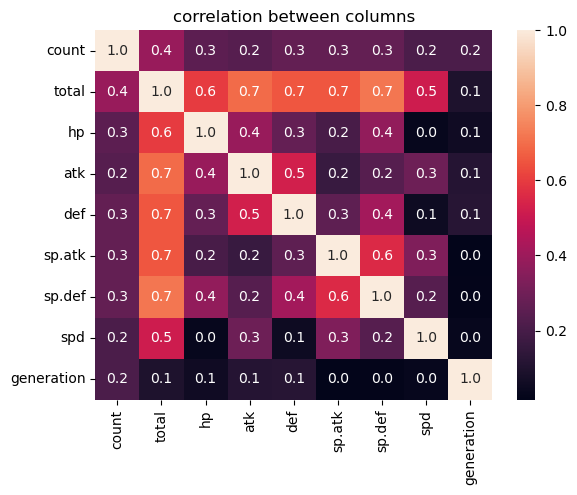

In [33]:
# create a heatmap to show the correlation between the columns
correlations = plot_data.corr() # create the correlation matrix
plot = sns.heatmap(correlations, cbar=True, annot=True, fmt=".1f") # create the heatmap
plt.title('correlation between columns') # add a title to the plot

# show the plots
plt.show()

As we can see, there is not really a correlation between the usage of a Pokémon and their generation. This is because the usage of a Pokémon is not dependent on their generation. This is because the usage of a Pokémon is dependent on the meta of the game. This means that the usage of a Pokémon is dependent on the current meta of the game. This is why the usage of a Pokémon is not dependent on their generation. But there is a correlation between the other stats of a Pokémon.

After this I wanted to create a parallel coordinates plot to show the correlation between the different columns in the dataset. This is so that I can see the correlation between the different columns in the dataset since I did not really see anything in the heatmap. For the parallel coordinates plot I wanted to use normalized data. This is so that the plot is easier to read.

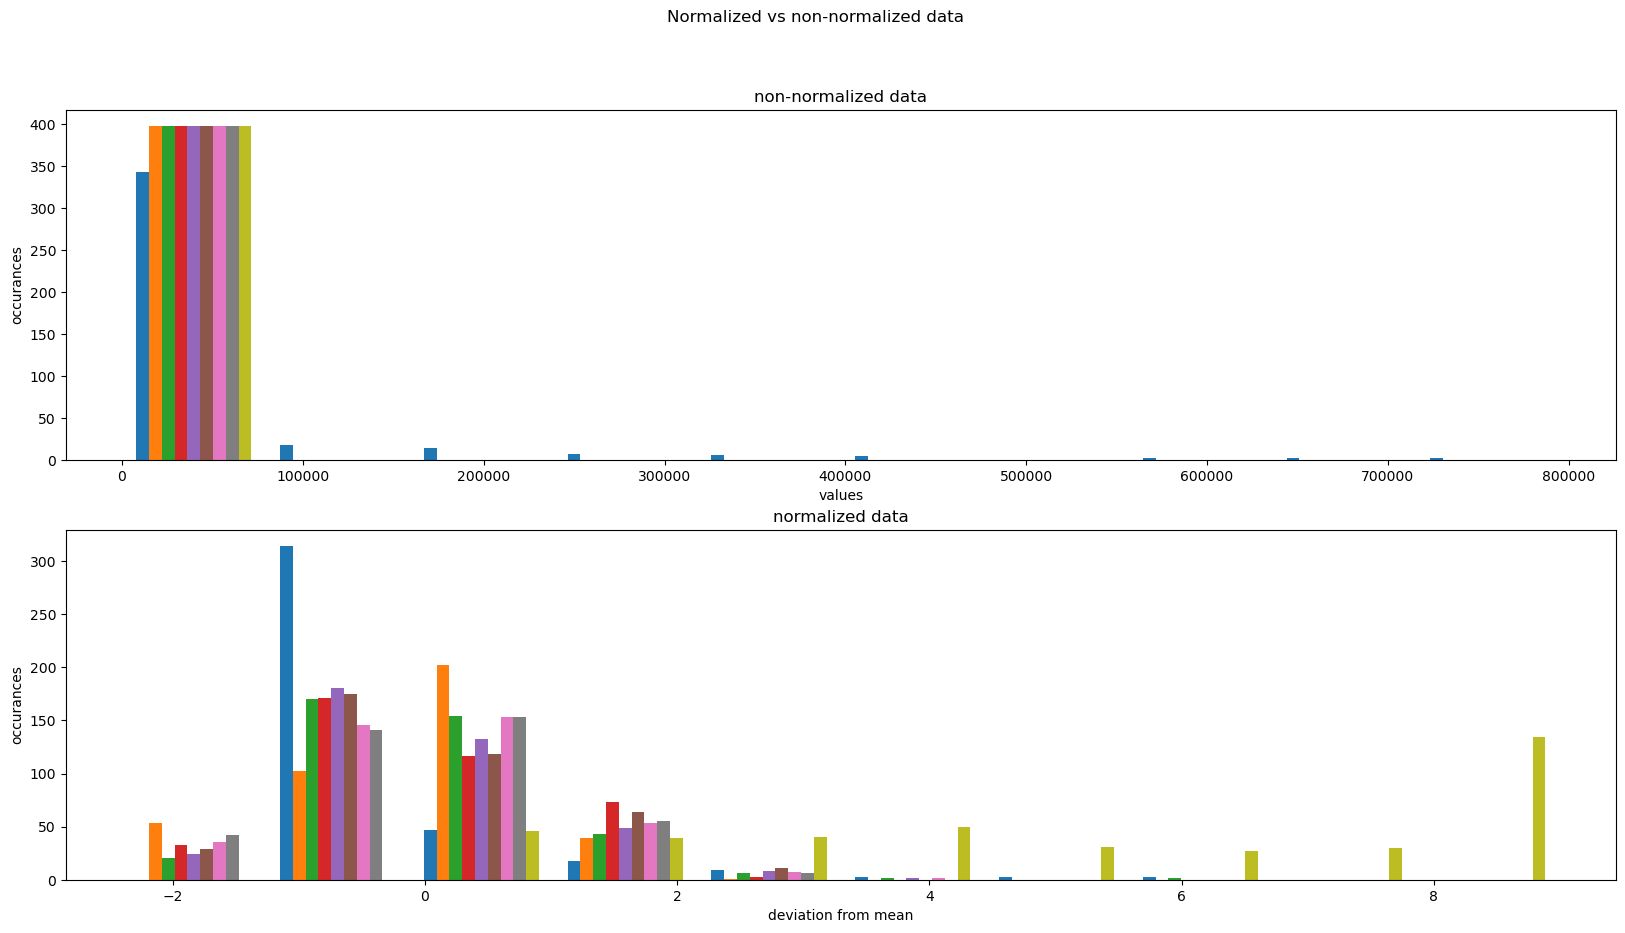

In [34]:
norm_plot_data = plot_data.copy() # create a copy of the plot_data dataframe

# normalize the data
norm_plot_data[['count','total', 'hp', 'atk', 'def', 'sp.atk', 'sp.def', 'spd']] = (norm_plot_data[['count', 'total', 'hp', 'atk', 'def', 'sp.atk', 'sp.def', 'spd']] - norm_plot_data[['count', 'total', 'hp', 'atk', 'def', 'sp.atk', 'sp.def', 'spd']].mean()) / norm_plot_data[['count', 'total', 'hp', 'atk', 'def', 'sp.atk', 'sp.def', 'spd']].std()

plt.figure(figsize=[20, 10])
plt.suptitle('Normalized vs non-normalized data')
labels = ['count','total','type1', 'type2', 'hp', 'atk', 'def', 'sp.atk', 'sp.def', 'spd','generation', "monotype"] # create a list with the labels for the legend
plt.legend(labels=labels,
           loc="upper right") # create a legend for the plot
plt.subplots_adjust(right=0.9) # adjust the spacing between the plots

plt.subplot(2,1,1)
plt.title('non-normalized data') # add a title to the plot
plt.xlabel('values') # add a label to the x-axis
plt.ylabel('occurances') # add a label to the y-axis
plt.hist(plot_data) # create the histogram

plt.subplot(2,1,2)
plt.title('normalized data') # add a title to the plot
plt.xlabel('deviation from mean')# add a label to the x-axis
plt.ylabel('occurances') # add a label to the y-axis
plt.hist(norm_plot_data) # create the histogram

plt.show()

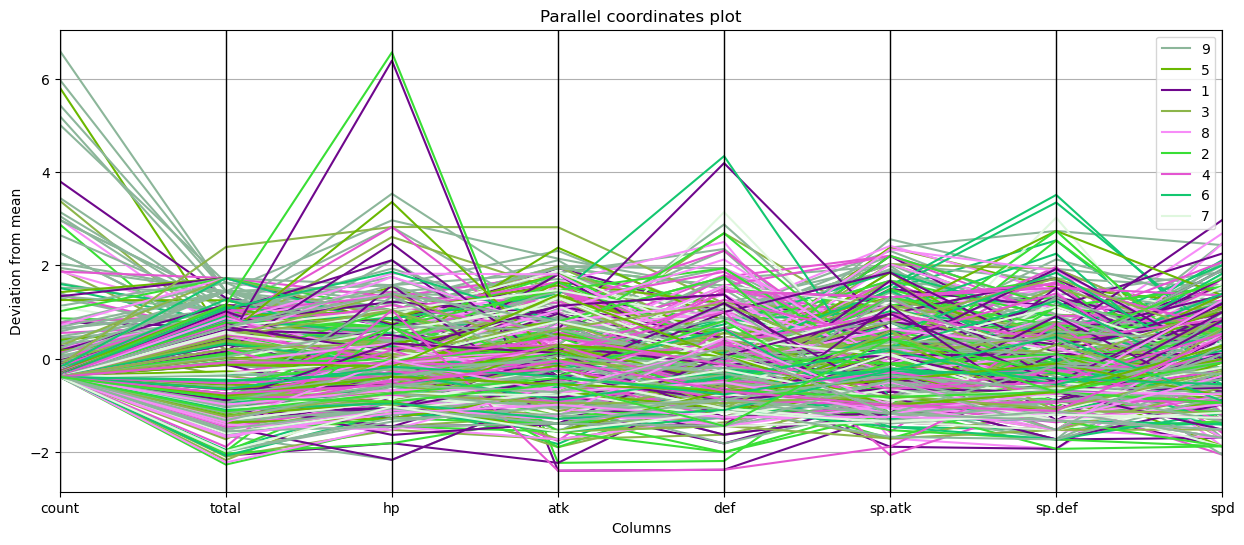

In [35]:
fig = plt.figure(figsize=[15,6]) # set the size of the figure
ax = parallel_coordinates(norm_plot_data,'generation') # create the parallel coordinates plot
ax.set_ylabel('Deviation from mean') # add a label to the y-axis
ax.set_xlabel('Columns') # add a label to the x-axis
ax.set_title('Parallel coordinates plot') # add a title to the plot
plt.show() # show the plot

This still did not really show a clear correlation between the different columns. This is because the data is not normalized. This is why I wanted to create a pair plot to maybe find a correlation between the different columns.

Now I wanted to check see if there really was no significant correlation between the different columns. To do this I found a pretty interesting library that makes interactive plots through a html and javascript file. this library is called [plotly](https://plotly.com/python/). This library is pretty easy to use and makes it easy to create interactive plots. This is why I wanted to use this library to create a combination of plots that show the usage stats in correlation with the stats of the Pokémon.

This was my first time using the plotly library, so I took multiple steps before making a grid that plots all the stats, first I wanted to just plot the attack and special attack stats of the Pokémon. After I found that I would need a different part of the library to the grid of plots I wanted.

In [36]:
pairplot_data = plot_data[['count','total', 'hp', 'atk', 'def', 'sp.atk', 'sp.def', 'spd']].copy() # create a copy of the plot_data dataframe

#sns.pairplot(pairplot_data, hue='count') # create the pairplot with the count column as hue

In [37]:
import plotly.graph_objects as go
from plotly import __version__
print(__version__)

5.9.0


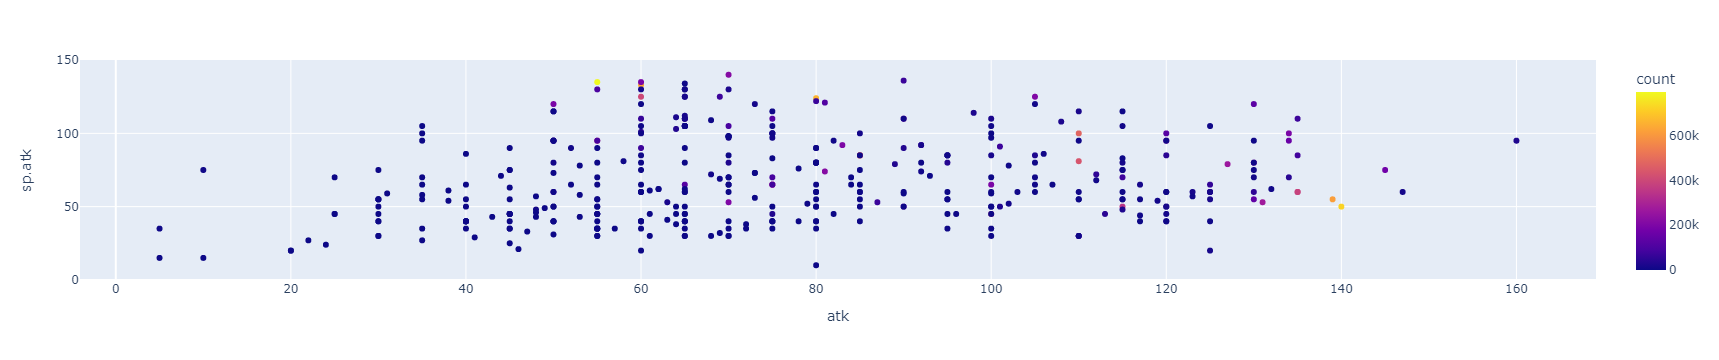

In [38]:
import plotly.express as px
plot_data = df_gen9.copy() # create a copy of the plot_data dataframe
fig = px.scatter(plot_data, color='count', x='atk', y='sp.atk') # make scatter plot
fig.show()

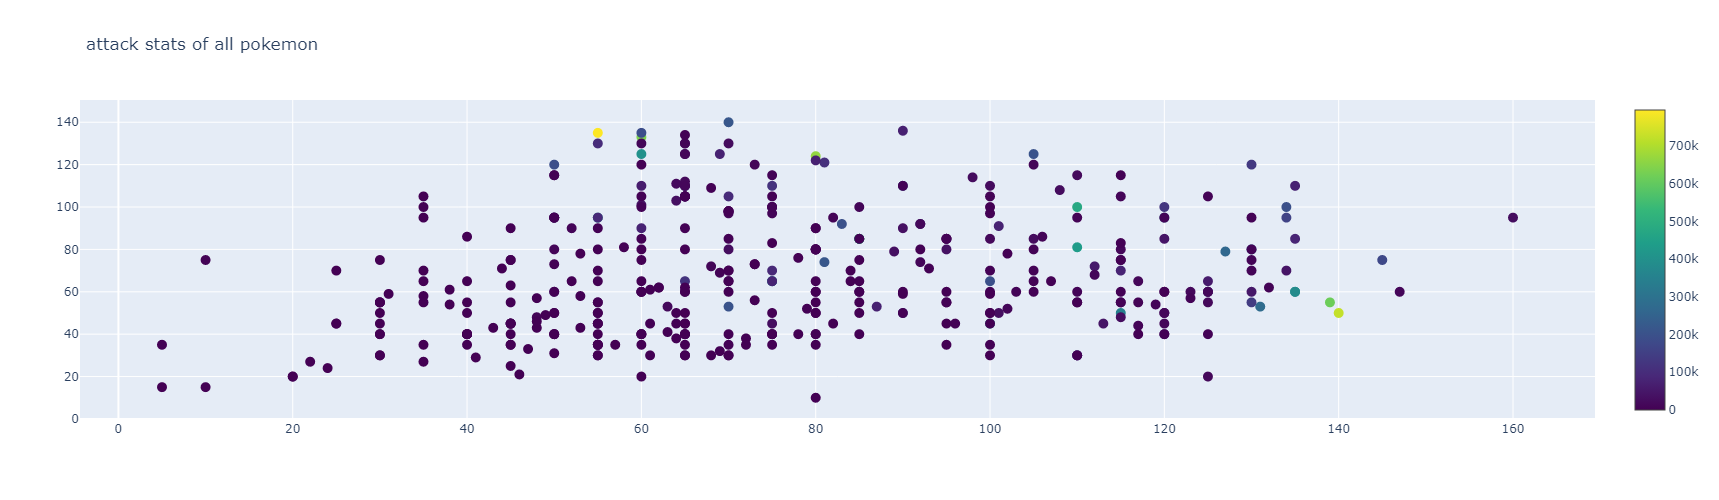

In [39]:
count_cmap = dict(size=10, color=plot_data['count'], colorscale='Viridis', showscale=True) # set color equal to a variablecolorscale='Viridis', # one of plotly color
                                
#make a figure
fig = go.Figure(data=go.Scatter(x=plot_data['atk'],
                                y=plot_data['sp.atk'],
                                mode='markers', # specify the type of visual representation on the plot
                                marker_color=plot_data['count'], 
                                text=plot_data['pokemon'], # define hover text
                                marker=count_cmap # define colormap
                                )) 
fig.update_layout(height = 500, title='attack stats of all pokemon') # define height and title of the plot
fig.show()

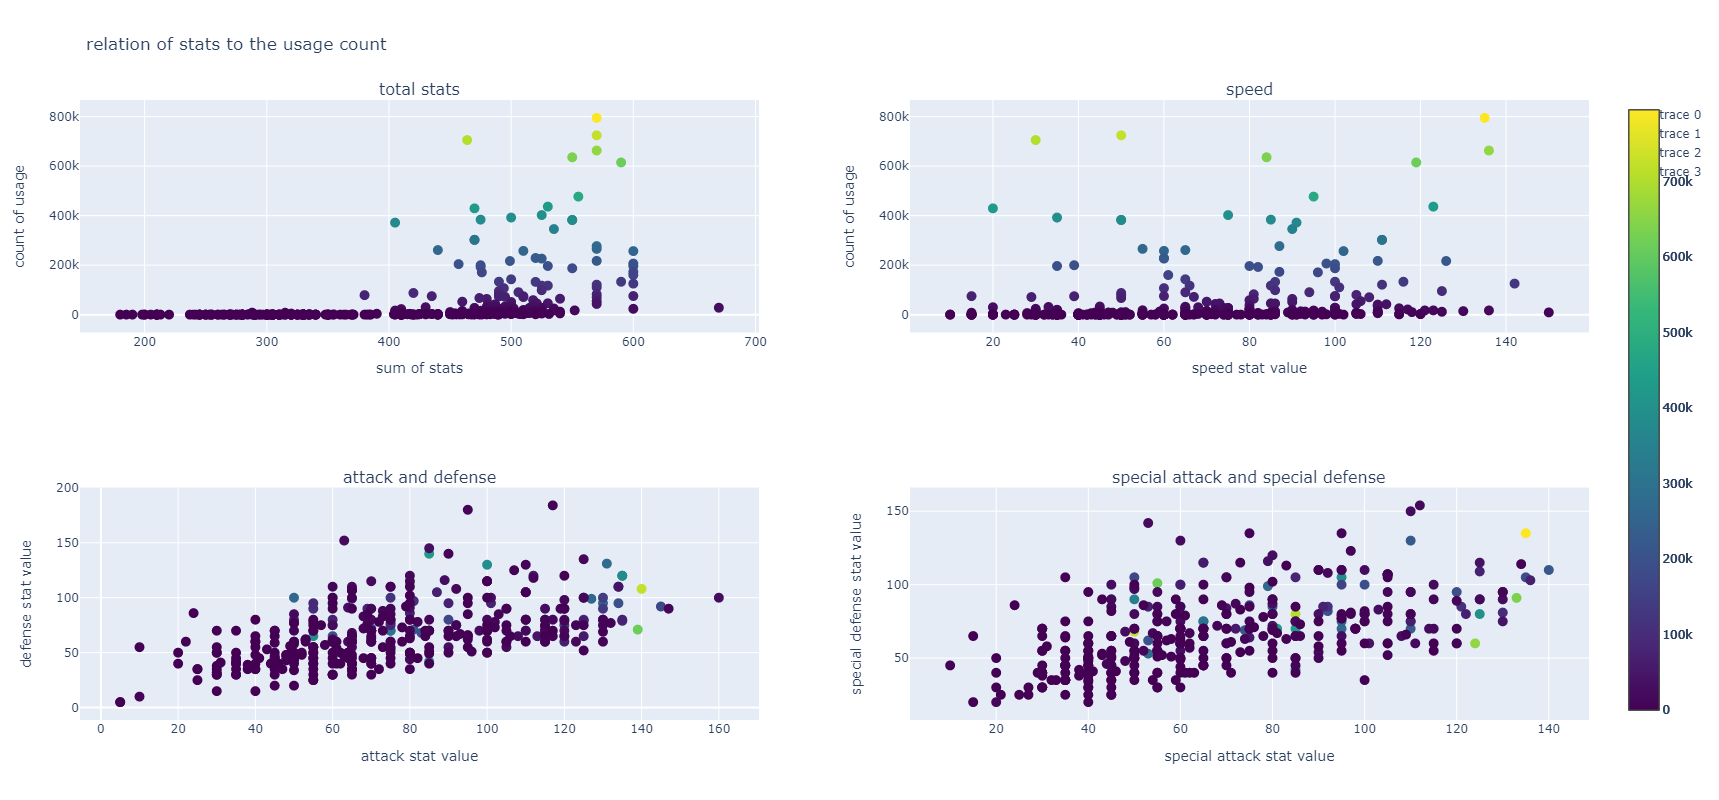

In [40]:
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("total stats", "speed", "attack and defense", "special attack and special defense")) # title of the plots, left to right, top to bottom

fig.add_trace(go.Scatter( # adds scatterplot as a subplot
    x=plot_data['total'],
    y=plot_data['count'],
    mode="markers",
    text=plot_data['pokemon'],
    marker=count_cmap),
    row=1, col=1) # define place of the subplot

fig.add_trace(go.Scatter(
    x=plot_data['spd'],
    y=plot_data['count'],
    mode="markers",
    text=plot_data['pokemon'],
    marker=count_cmap),
    row=1, col=2)

fig.add_trace(go.Scatter(
    x=plot_data['atk'],
    y=plot_data['def'],
    mode="markers",
    text=plot_data['pokemon'],
    marker=count_cmap),
    row=2, col=1)

fig.add_trace(go.Scatter(
    x=plot_data['sp.atk'],
    y=plot_data['sp.def'],
    mode="markers",
    text=plot_data['pokemon'],
    marker=count_cmap),
    row=2, col=2)


fig.update_layout(height=800,
                  title_text="relation of stats to the usage count")

# edit axis labels
fig['layout']['xaxis']['title']='sum of stats'
fig['layout']['yaxis']['title']='count of usage'
fig['layout']['xaxis2']['title']='speed stat value'
fig['layout']['yaxis2']['title']='count of usage'
fig['layout']['xaxis3']['title']='attack stat value'
fig['layout']['yaxis3']['title']='defense stat value'
fig['layout']['xaxis4']['title']='special attack stat value'
fig['layout']['yaxis4']['title']='special defense stat value'

fig.show()

After plotting all the base stats of the Pokémon, I wanted to see if there was a noteworthy correlation for the usage of the Pokémon and categorical values such as generation and type. To do this I wanted to create a pie chart that shows the usage of the Pokémon per generation.

To do this I first created a list with the total amount of Pokémon usages per generation. After that I created the pie chart with the list as data and the labels as the generation numbers.
```python
# create a list with the total amount of Pokémon for generation 9
gen9_counts = []
for x in range(1, 10):
    gen9_counts.append(df_gen9.loc[df_gen9['generation'] == x, 'count'].sum())
    
# checking if the list is created correctly
print(gen9_counts)

```
At first I created these with some lines of code, later on in the notebook I needed to perform this kind of operation again so I made it into a function instead.

In [41]:
# function to determine usage of pokemon from certain generation
def GetGenCount(gen_count, df): # amount of generations available, dataframe to calculate from
    gen_counts = []
    for x in range(1, gen_count + 1):
        gen_counts.append(df.loc[df['generation'] == x, 'count'].sum())
    return gen_counts
                   

Text(0.5, 1.0, 'Usage of Pokémon per generation')

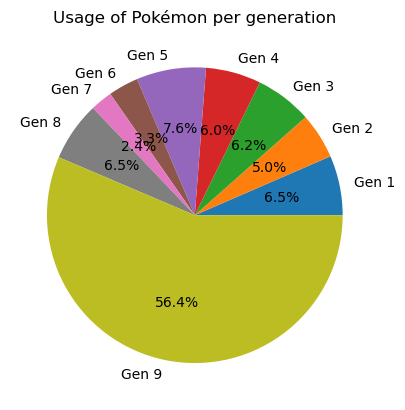

In [42]:
plt.pie(GetGenCount(gen_count = 9, df = df_gen9), labels=['Gen 1', 'Gen 2', 'Gen 3', 'Gen 4', 'Gen 5', 'Gen 6', 'Gen 7', 'Gen 8','Gen 9'], autopct='%1.1f%%') # create the pie chart
plt.title('Usage of Pokémon per generation') # add a title to the plot

In this plot you can clearly see that there is a big difference in the usage of Pokémon from different generations. The plot shows that the generation 9 Pokémon are used a lot more than the other generations. I think this is because there is a bias towards using the newest Pokémon because it is the most exciting way to make new strategies. Generation 9 Pokémon in particular are also used more because there are a lot of very strong Pokémon in this generation, more so than in the earlier generations

I made this pie chart before I started using the pyplot library, so I wanted to make a pie chart with the plotly library. This is because the plotly library makes it easy to create interactive plots and wanted some more practice with this library. I used the same data as I did in the previous pie chart. I also made an extra plot to give a bit of context to see how many pokemon from each generation are available in this gamemode of pokemon showdown.

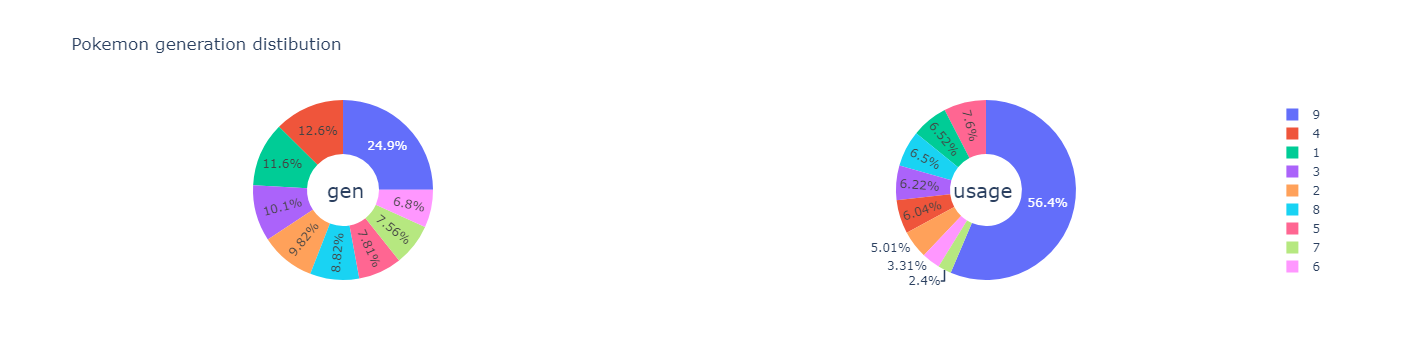

In [101]:
gen_spread = plot_data.generation.value_counts().rename_axis('gen').reset_index(name='counts') # create dataframe from the value_count() function

gen_labels = gen_spread.gen # get gen(eration) values from value_count() df
gen_values = gen_spread.counts # get count of usage values from value_count() df

usage_labels=1,2,3,4,5,6,7,8,9 # all of the available generation
usage_values = GetGenCount(gen_count = 9, df = df_gen9) # getting the generation count


fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=gen_labels, values=gen_values),
              1, 1)
fig.add_trace(go.Pie(labels=usage_labels, values=usage_values),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Pokemon generation distibution",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='gen', x=0.21, y=0.5, font_size=20, showarrow=False),
                 dict(text='usage', x=0.80, y=0.5, font_size=20, showarrow=False)])
fig.show()

You can see that generation 9 currently has a lot more usage than the other generation in the other generations. It is the generation that has the most pokemon available but it is still a proportionally more used generation

Now I want to create multiple plots to see if there are any trends in the usage of the Pokémon per type. I will make 4 pie charts, two to show the distribution of the pokemon types for the pokemon and 2 to show the usage per type.

First I am going to make the data for the pie charts to show amount of pokemon per type and usage per type.

In [44]:
# function to get amount of usages per primary type of pokemon
def GetType1Usage(df):
    type1_values = df.type1.value_counts().rename_axis('types').reset_index(name='counts')
    type_usage = []
    for x in range(0,18):
        pkm_type = type1_values.loc[x].types
        type_usage.append(df.loc[df['type1'] == pkm_type, 'count'].sum())
    return type_usage

In [45]:
# function to get amount of usages per secondary type of pokemon
def GetType2Usage(df):
    type2_values = df.type2.value_counts().rename_axis('types').reset_index(name='counts')
    type_usage = []
    for x in range(0,19):
        pkm_type = type2_values.loc[x].types
        type_usage.append(df.loc[df['type2'] == pkm_type, 'count'].sum())
    return type_usage

In [46]:
# checking if the function return array is created correctly
print(GetType1Usage(df_gen9))

[1025431, 1244916, 757158, 1823337, 472966, 1697728, 1825017, 781125, 134992, 710886, 1993897, 1099183, 1410820, 407550, 770423, 603395, 739002, 146789]


In [47]:
# checking if the function return array is created correctly
print(GetType2Usage(df_gen9))

[3627464, 1493010, 1453871, 609638, 953303, 1185995, 1101227, 1527696, 1443361, 791540, 374658, 527296, 311360, 1140524, 248742, 44903, 767459, 15693, 26875]


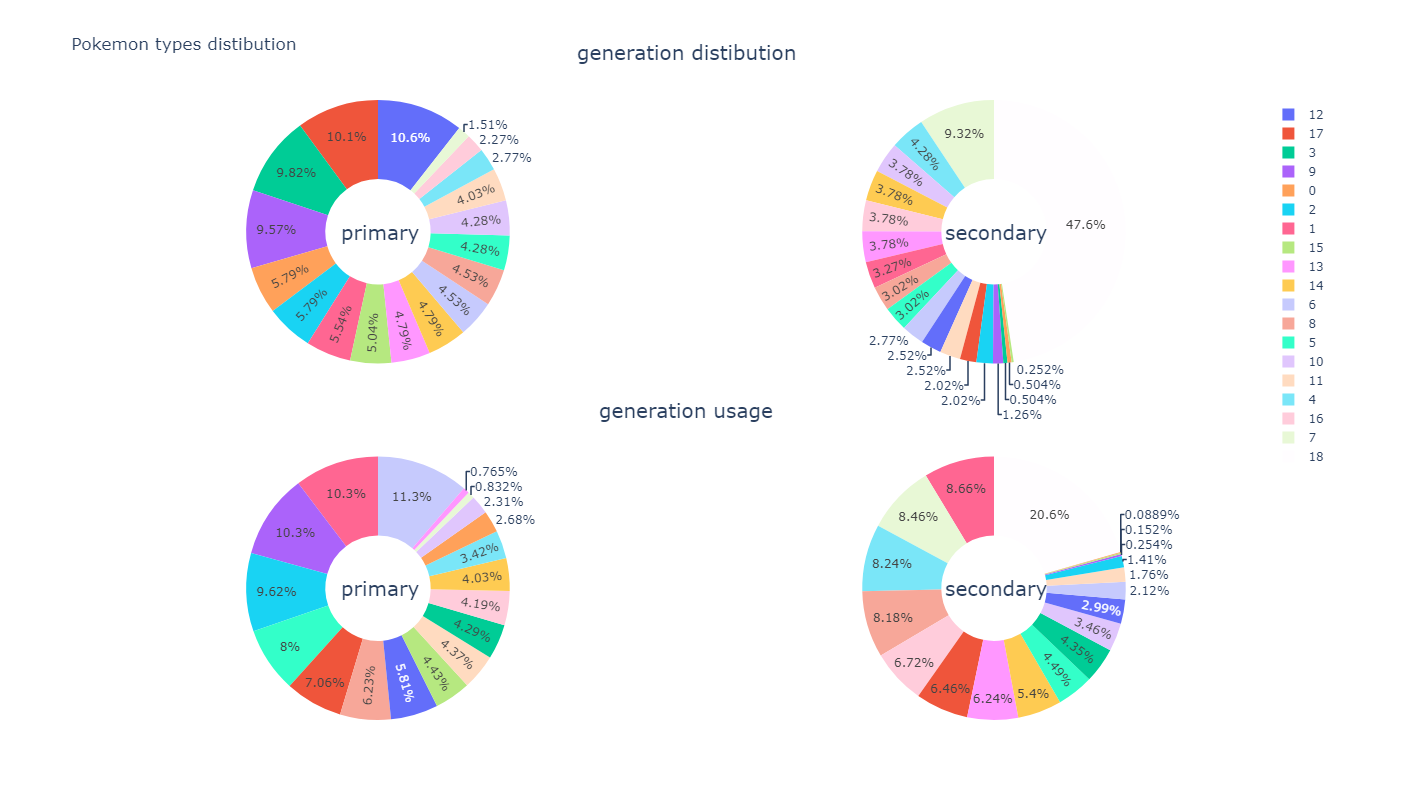

In [120]:
gen9_type1 = df_gen9.type1.value_counts().rename_axis('types').reset_index(name='counts')
gen9_type2 = df_gen9.type2.value_counts().rename_axis('types').reset_index(name='counts')

labels_type1 = gen9_type1.types
labels_type2 = gen9_type2.types

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=2, cols=2, specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels_type1, values=gen9_type1['counts'], name="type 1"),
              1, 1)
fig.add_trace(go.Pie(labels=labels_type2, values=gen9_type2['counts'], name="type 2"),
              1, 2)
fig.add_trace(go.Pie(labels=labels_type1, values=GetType1Usage(df_gen9), name="type 1"),
              2, 1)
fig.add_trace(go.Pie(labels=labels_type2, values=GetType2Usage(df_gen9), name="type 2"),
              2, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Pokemon types distibution",
    height=800,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='primary', x=0.19, y=0.81, font_size=20, showarrow=False),
                 dict(text='secondary', x=0.825, y=0.81, font_size=20, showarrow=False),
                 dict(text='generation distibution', x=0.50, y=1.1, font_size=20, showarrow=False),
                 dict(text='primary', x=0.19, y=0.19, font_size=20, showarrow=False),
                 dict(text='secondary', x=0.825, y=0.19, font_size=20, showarrow=False),
                 dict(text='generation usage', x=0.5, y=0.5, font_size=20, showarrow=False),
                ])
fig.show()

You can see here that there are some primary types are proportionally used less than others, the ones where this is very obvious are normal, electric and fighting typings. Fire, dark and dragon are used proportionally more if this is their primary type. I have no idea why these certain types are used more.

For secondary typings, the pokemon without a secondary typings are not very popular, this is probably because these pokemon have access to more moves and have more attack bonusses because of their two typings. This is because if a move is the same type as the type of a pokemon it does 1.5 times the damage. This makes pokemon with a secondary typing have an advantage over those that do not.

---
## Trend visualization
In the data visualization part of this notebook I want to focus more on the trends that exist in the most used Pokémon. I want to see if there are any trends in the stats of the most used Pokémon. I also want to see if there are any trends in the type and generation of the most used Pokémon. I will be working with the usage data from multiple months

### Data collection
First I will be using the usage stats from january, february and march, because these are the only months with usage stats currently available for generation 9 official format competitive Pokémon.

In [49]:
# rename earlier imported dataframe
df_gen9_jan = df_gen9.copy()

# import dataframes for febuary and march, the only ones currently available
usage_stats_feb = import_showdown_usage_stats(url = "https://www.smogon.com/stats/2023-02/gen9vgc2023series2-0.txt", filename="gen9s2vgc0_feb.txt")
df_gen9_feb = merge_usage_stats(usage_stats_feb)
print(df_gen9_feb.shape)
display(df_gen9_feb.dtypes)


usage_stats_mar = import_showdown_usage_stats(url = "https://www.smogon.com/stats/2023-03/gen9vgc2023series2-0.txt", filename="gen9s2vgc0_mar.txt")
df_gen9_mar = merge_usage_stats(usage_stats_mar)
print(df_gen9_mar.shape)
display(df_gen9_mar.dtypes)

(407, 15)


pokemon        object
count           int32
usage         float64
dexnum          int32
type1          object
type2          object
total           int32
hp              int32
atk             int32
def             int32
sp.atk          int32
sp.def          int32
spd             int32
generation      int64
monotype        int32
dtype: object

(396, 15)


pokemon        object
count           int32
usage         float64
dexnum          int32
type1          object
type2          object
total           int32
hp              int32
atk             int32
def             int32
sp.atk          int32
sp.def          int32
spd             int32
generation      int64
monotype        int32
dtype: object

the amount of Pokémon in the usage stats for february and march are different from the amount of Pokémon in the usage stats for january. This is because some Pokémon were banned from the competitive gamemode in february and march. I will remove these Pokémon from the dataframe so that I can use the same data for all months.

```python
# remove pokemon that are ot in the original datasets
df_gen9_feb = df_gen9_feb[df_gen9_feb['pokemon'].isin(df_gen9_jan['pokemon'])]
df_gen9_mar = df_gen9_mar[df_gen9_mar['pokemon'].isin(df_gen9_jan['pokemon'])]

print(df_gen9_jan.shape)
print(df_gen9_feb.shape)
print(df_gen9_mar.shape)
```

The dataframes are all different sizes. This is because the ban list is different for each month in the usage stats. These bans are based on the in-game ban list that works in seasons. you can find the ban list [here](https://www.serebii.net/scarletviolet/rankedbattle/season2.shtml), by selecting different seasons in the dropdown menu and scrolling down to the banned Pokémon list at the bottom on the page you can see which Pokémon are banned. Later I stopped using this because I found it unnecessary for the data.

I will start with plotting the different present categorical values(type1, type2 and generation) to get an insight if these change over time. To do this I will need to collect the data first.

In [84]:
# getting data from earlier created function
gen_usage_jan = GetGenCount(gen_count = 9, df = df_gen9_jan)
gen_usage_feb = GetGenCount(gen_count = 9, df = df_gen9_feb)
gen_usage_mar = GetGenCount(gen_count = 9, df = df_gen9_mar)

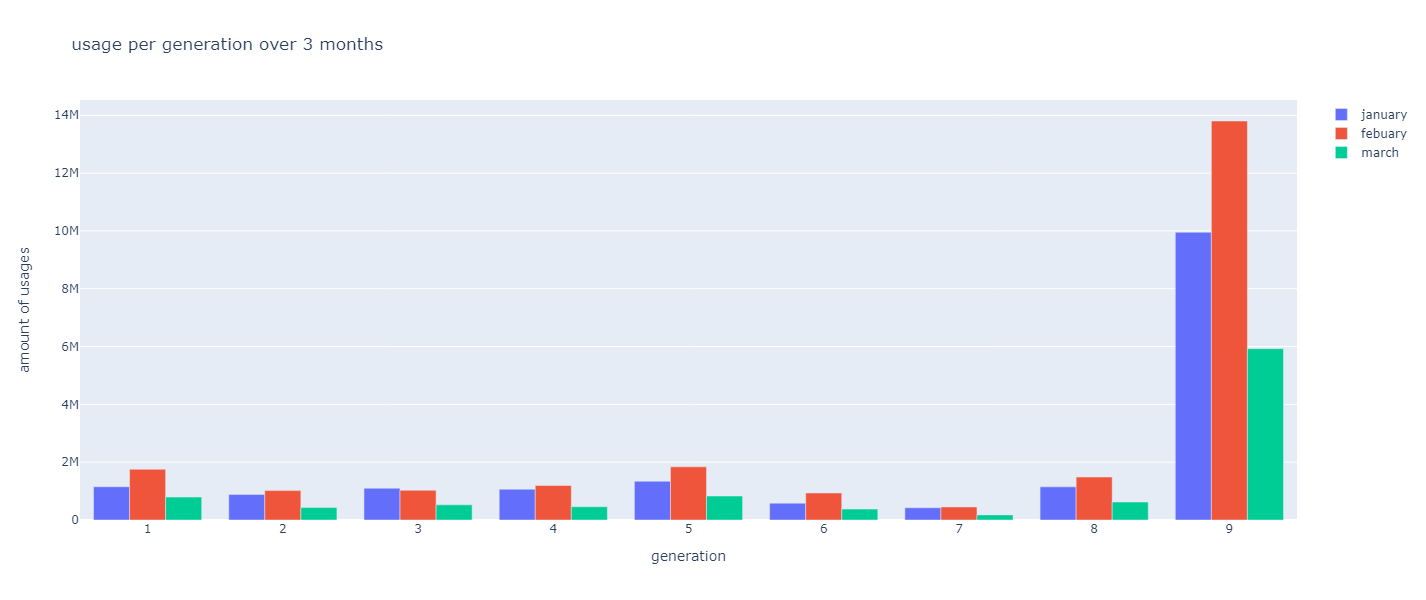

In [85]:
generations=[1,2,3,4,5,6,7,8,9]

fig = go.Figure(data=[
    go.Bar(name='january', x=generations, y=gen_usage_jan, hovertext = gen_usage_jan),
    go.Bar(name='febuary', x=generations, y=gen_usage_feb, hovertext = gen_usage_feb),
    go.Bar(name='march', x=generations, y=gen_usage_mar, hovertext = gen_usage_mar)])
# Change the bar mode
fig.update_layout(barmode='group',
                  height=600,
                 title_text='usage per generation over 3 months',
                 )

fig['layout']['xaxis']['title']='generation'
fig['layout']['yaxis']['title']='amount of usages'

fig.show()

This plot was not a fair representation of the usage of pokemon for each generation, because it it hard to read the values other than those of generation 9. This does give insight in which generation is used all across te board. It is also an unfair reprisentation of months because it is obvious that there were less matches played in march than in febuary. To make the chart look 'fair' for every month I want to make a chart that shows how each generation is used every months in proportion to the times the game was played.

To do this I first need to make the amounts proportional to eachother. I will do this by multiplying all the usage values of febuary and marrch based on the total usage of january 

In [102]:
# getting total amount of count value in dfs
jan_total = df_gen9_jan['count'].sum()
feb_total = df_gen9_feb['count'].sum()
mar_total = df_gen9_mar['count'].sum()

# check the values
print(jan_total)
print(feb_total)
print(mar_total)

17644615
23504327
10138169


In [103]:
# devide the jan_total by total from other months to create a dfs with the same total count of usages and still keep the values proportional.
feb_modifier = jan_total / feb_total
mar_modifer = jan_total / mar_total

# check the values
print(feb_modifier)
print(mar_modifer)

0.7506964568694097
1.7404143687089848


In [55]:
# make new dfs for the new count of usages
df_gen9_feb_modified = df_gen9_feb.copy()
df_gen9_mar_modified = df_gen9_mar.copy()

# actually scale the count of usages
df_gen9_feb_modified['count'] = (df_gen9_feb_modified['count'] * feb_modifier)
df_gen9_mar_modified['count'] = (df_gen9_mar_modified['count'] * mar_modifer)


In [86]:
# get new generation usage counts with the new dataframes
gen_usage_feb_modified = GetGenCount(gen_count = 9, df = df_gen9_feb_modified)
gen_usage_mar_modified  = GetGenCount(gen_count = 9, df = df_gen9_mar_modified)

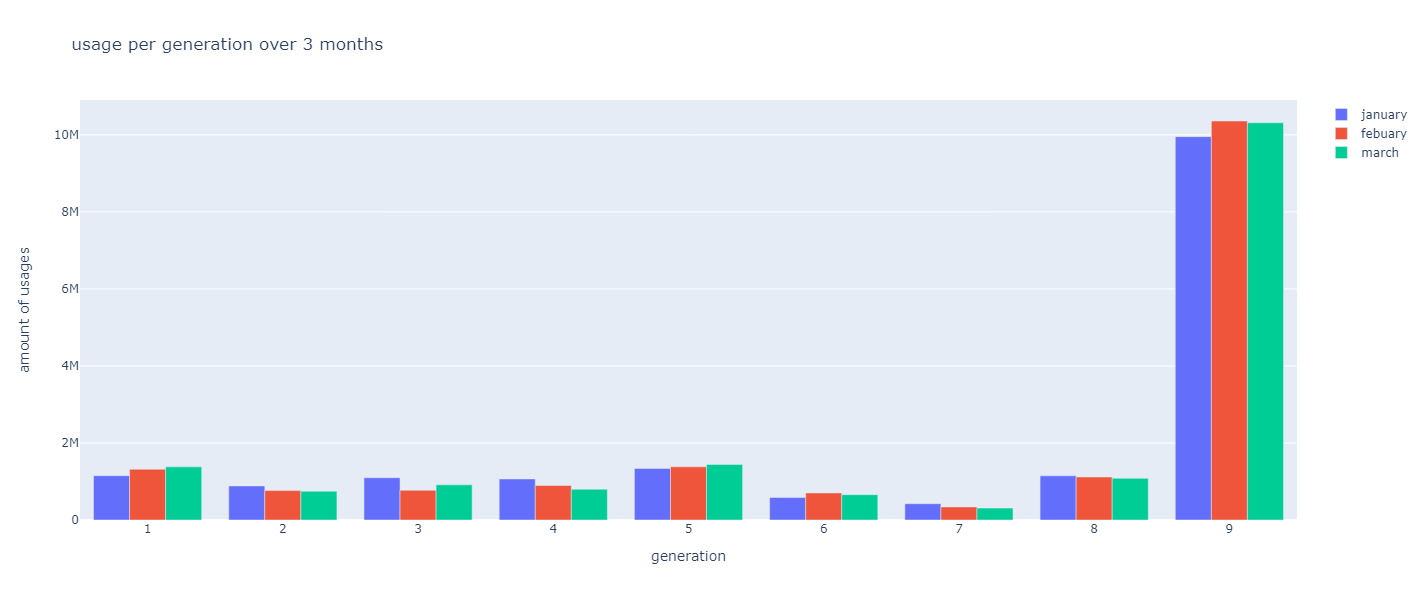

In [88]:
fig = go.Figure(data=[
    go.Bar(name='january', x=generations, y=gen_usage_jan, hovertext = gen_usage_jan),
    go.Bar(name='febuary', x=generations, y=gen_usage_feb_modified, hovertext = gen_usage_feb_modified),
    go.Bar(name='march', x=generations, y=gen_usage_mar_modified, hovertext = gen_usage_mar_modified)])
# Change the bar mode
fig.update_layout(barmode='group',
                  height=600,
                 title_text='usage per generation over 3 months',
                 )

fig['layout']['xaxis']['title']='generation'
fig['layout']['yaxis']['title']='amount of usages'

fig.show()

Now the bar plot gives a way better insight into what generation is used over the months. Even if the amount of usages is not really accurate, it still shows a proportionally better amount of usages per generation.

Now I want to do the same as I did with the generations with the different types of pokemon. Doing this in the form of a barplot like above would probably be a bad idea because there are 18 variables from 3 different time periods, so I will need to make a stacked barplot instead. I will be using the modified usage count data to start with a more fair distibution.

In [93]:
#creating the data for the plot
jan_type1_usage =  GetType1Usage(df_gen9_jan)
jan_type2_usage =  GetType2Usage(df_gen9_jan)

feb_type1_usage =  GetType1Usage(df_gen9_feb_modified)
feb_type2_usage =  GetType2Usage(df_gen9_feb_modified)

mar_type1_usage =  GetType1Usage(df_gen9_mar_modified)
mar_type2_usage =  GetType2Usage(df_gen9_mar_modified)

#creating labels for plots
labels_type1 = gen9_type1.types
labels_type2 = gen9_type2.types

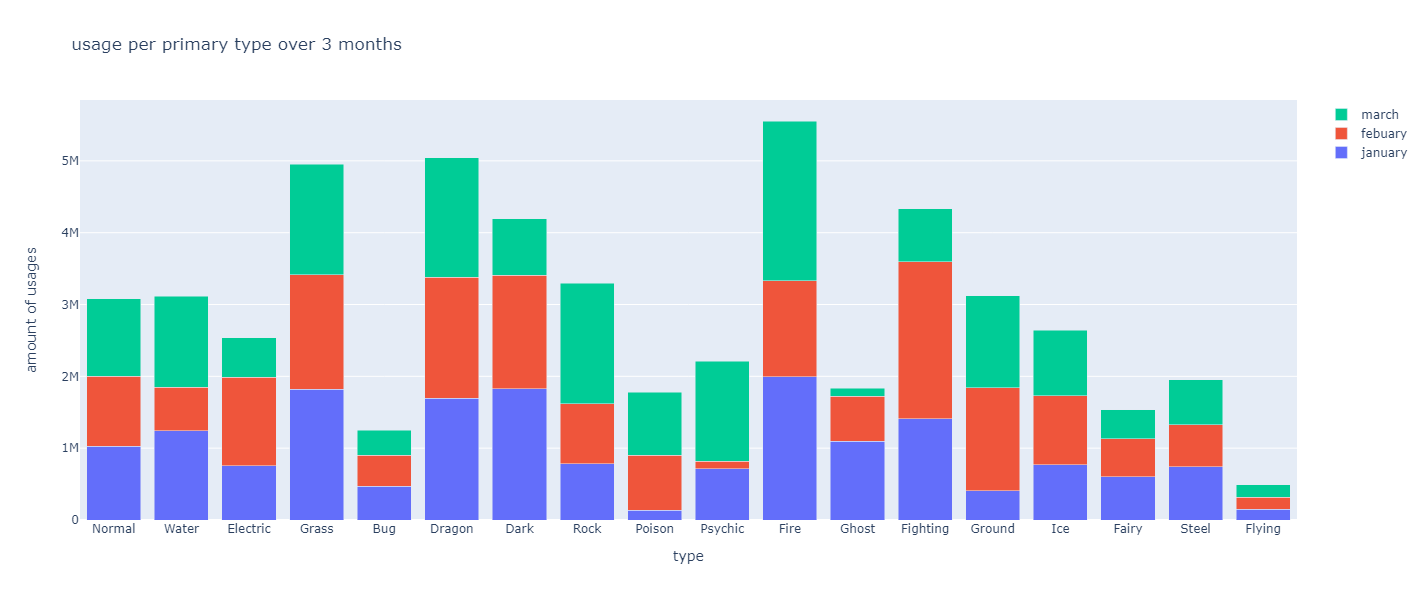

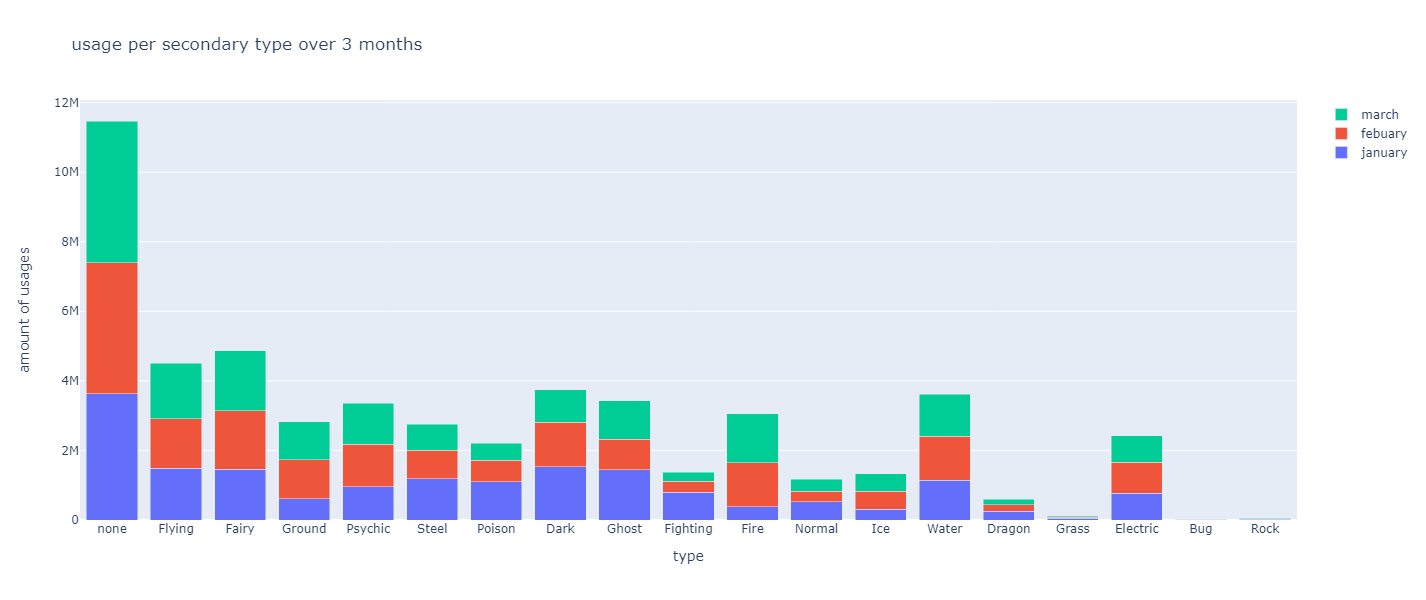

In [97]:
# make a figure for the primary typing
fig1 = go.Figure(data=[
    go.Bar(name='january', x=labels_type1, y=jan_type1_usage),
    go.Bar(name='febuary', x=labels_type1, y=feb_type1_usage),
    go.Bar(name='march', x=labels_type1, y=mar_type1_usage),
])
# Change the bar mode
fig1.update_layout(barmode='stack',
                  height=600,
                 title_text='usage per primary type over 3 months',
                 )

fig1['layout']['xaxis']['title']='type'
fig1['layout']['yaxis']['title']='amount of usages'

fig1.show()

# make a figure for the secondary typing
fig2 = go.Figure(data=[
    go.Bar(name='january', x=labels_type2, y=jan_type2_usage),
    go.Bar(name='febuary', x=labels_type2, y=feb_type2_usage),
    go.Bar(name='march', x=labels_type2, y=mar_type2_usage),
])
# Change the bar mode
fig2.update_layout(barmode='stack',
                  height=600,
                 title_text='usage per secondary type over 3 months',
                 )

fig2['layout']['xaxis']['title']='type'
fig2['layout']['yaxis']['title']='amount of usages'

fig2.show()

You can see here that there some types wildly vary from month to month, this is very apparant with psychic., ghost or ground primary types. The changes from month to month are less drastic with secondary typings. Pokemon that do not have a secondary type are still the most used in the first three months of 2023.

---
# Machine learning
## Preprocessing
### Encoding
To use the data in an ML model I need to encode the data. This is so that the ML model can use the data. I will use the '.codes' function from the pandas Categorical package. This assigns an integer value to each unique value in the column. Now there are no more strings in the column and ML models can use all available data.


In [58]:
df_gen9['type1'] = pd.Categorical(df_gen9['type1']).codes
df_gen9.type1.value_counts()

12    42
17    40
3     39
9     38
0     23
2     23
1     22
15    20
13    19
14    19
6     18
8     18
5     17
10    17
11    16
4     11
16     9
7      6
Name: type1, dtype: int64

In [59]:
# the type1 and type2 columns are string values, to use this in a ML model I need to convert them to corresponding int values
df_gen9['type1'] = pd.Categorical(df_gen9['type1']).codes
df_gen9['type2'] = pd.Categorical(df_gen9['type2']).codes
df_gen9

pokemon   count         usage  dexnum  type1  type2  total   hp  \
0    Flutter Mane  795029  2.804525e-01     987      8      4    570   55   
1      Iron Hands  724440  2.555517e-01     992      5      3    570  154   
2       Amoonguss  705360  2.488211e-01     591      9     13    464  114   
3     Iron Bundle  663073  2.339040e-01     991     11     17    570   56   
4       Gholdengo  635767  2.242716e-01    1000     16      8    550   87   
..            ...     ...           ...     ...    ...    ...    ...  ...   
392        Smoliv       1  4.000000e-07     928      9     12    260   41   
393     Bounsweet       1  4.000000e-07     761      9     18    210   42   
394      Staravia       1  4.000000e-07     397     12      7    340   55   
395         Nacli       1  4.000000e-07     932     15     18    280   55   
396      Houndour       1  4.000000e-07     228      1      6    330   45   

     atk  def  sp.atk  sp.def  spd  generation  monotype  
0     55   55     135     135  135           9         0  
1    140  108      50      68   50           9         0  
2     85   70      85      80   30           5         0  
3     80  114     124      60  136           9         0  
4     60   95     133      91   84           9         0  
..   ...  ...     ...     ...  ...         ...       ...  
392   35   45      58      51   30           9         0  
393   30   38      30      38   32           7         1  
394   75   50      40      40   80           4         0  
395   55   75      35      35   25           9         1  
396   60   30      80      50   65           2         0  

[397 rows x 15 columns]

### Feature selection
To make an ML model I need to select my target variable and the features I want to predict the target variable with. My target variable is the 'count' column. This is the amount of times a Pokémon is used in a battle. The features I want to use are the 'total', 'hp', 'atk', 'def', 'sp.atk', 'sp.def', 'spd' and 'generation' columns. These are the stats of a Pokémon and the generation they are from. I also want to use the 'type1' and 'type2' columns. These are the types of a Pokémon. I want to use these columns because I think that the type of Pokémon can have an effect on the usage of a Pokémon because some types are more effective against other types.

In [60]:
features = ["type1", "type2", "total", "hp", "atk", "def", "sp.atk", "sp.def", "spd", "generation"]
target = "count"

X = df_gen9[features]
y = df_gen9[target]
X.sample(10)

type1  type2  total   hp  atk  def  sp.atk  sp.def  spd  generation
327      8     10    320   55   55   80      70      45   15           7
244     14      7    476   75   70   70      98      70   93           7
197     12      9    475   80  100   70      60      70   95           5
160      8     10    480   85   75  110     100      75   35           7
114     15     18    470  100  125  135      20      20   70           8
153     12     18    500   90  130   75      75      75   55           2
60       7     16    495   98   87  105      53      85   67           8
64      17      7    540   95  125   79      60     100   81           1
181     14     18    390   60   45   70      75      85   55           5
356     12     18    330   60   80   50      50      50   40           2

### Train test split
To test the accuracy of my model I need to split the data into a train set and a test set. The train set is used to train the model. The test set is used to test the accuracy of the model. I will use an 80/20 split. This means that 80% of the data will be used for training and 20% for testing.

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print("There are in total", len(X), "observations, of which", len(X_train), "are now in the train set, and", len(X_test), "in the test set.")

There are in total 397 observations, of which 317 are now in the train set, and 80 in the test set.


## Modelling
### Decision tree
I will start with decision tree because it is only machine learning model that I know of that accepts multiple features. I will use the sklearn DecisionTreeRegressor model. This model is a regression model. This means that it predicts a continuous value. I will use the 'max_depth' parameter to limit the depth of the tree. This is to prevent over fitting. I will also use the 'score' function to get the accuracy of the model.

In [62]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=4)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("R^2:", score)

R^2: 0.442417889466309


This is a ridiculously low score. The negative score signifies that the R^2 came back negative and the model is most likely not suited for this problem. I could try to normalize the data and see if that helps. First I tried normalizing all the data of the features. I later found this unnecessary. It will need me to get a new train/test split, this makes it hard to compare the results.
```python
from sklearn.preprocessing import normalize
norm_features = X.copy() # create a copy of the df_gen9 dataframe
norm_values = ['total', 'hp', 'atk', 'def', 'sp.atk', 'sp.def', 'spd'] # create a list with the columns I want to normalize
norm_features[norm_values] = normalize(norm_features[norm_values]) # normalize the data
```
To actually compare the two I just normalized the already split train and test set of the features.

In [63]:
from sklearn.preprocessing import normalize
norm_X_train = normalize(X_train)
norm_X_test = normalize(X_test)

In [64]:
model = DecisionTreeRegressor(max_depth=15)
model.fit(norm_X_train, y_train)
score = model.score(norm_X_test, y_test)
print("R^2:", score)

R^2: 0.3101247692911947


Even though I knew the problem I am dealing with is a regression problem and not a classification problem because of the continuous values I want to predict. I still wanted to try out the decision tree classifier. I will use the same parameters and train/test split as the regressor.

In [65]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=15)
model.fit(norm_X_train, y_train)
score = model.score(norm_X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.0


### Feature selection
The score is still very low. I even tried switching between the decision tree regressor and classifier. Both had very bad results. So I will now try feature selection to see if there is even a way to make this model usable. I will try to use the feature importance function from the sklearn package. This will give me a score for each feature. The higher the score the more important the feature is.

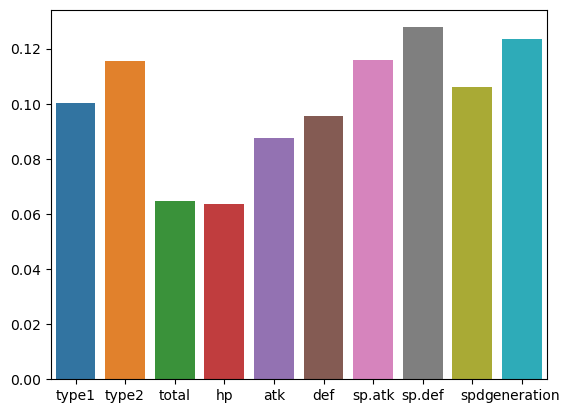

In [66]:
plot = sns.barplot(y=model.feature_importances_, x=features)

When looking at the feature importance plot you will see that none of the features have a high score, this means they are not really important when predicting the target variable. This plot also changes a lot when I rerun the model because of the randomness of the train/test split and the randomness of the decision tree.

After trying everything I think it is clear that decision tree is not a good model for this data. After doing more research as to why it didn't work it was because decision tree does not handle continuous values well. This means that all values that are akin to a spectrum will not really be fitting to use a decision tree model for. I will need to try a different model.

### Random forest
The random forest model is an ensemble model. This means that it uses multiple decision trees to make a prediction. This is to prevent over-fitting. I will use the sklearn RandomForestRegressor model. This model is a regression model. This means that it predicts a continuous value. I will use the 'max_depth' parameter to limit the depth of the tree. This is to prevent over-fitting. I will also use the 'score' function to get the accuracy of the model.

In [67]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators = 100, max_depth=15, n_jobs=-1)
rf = random_forest.fit(X_train, y_train)
score = rf.score(X_test, y_test)
print("R^2:", score)

R^2: 0.410045870319236


This is a much better score, and (a majority of the time) it is a positive score. This means that the model is actually usable, but it is still to random as the name implies. Sometimes a got a R^2 score of ~0.15 on the lower end and ~0.40 on the higher end. To use this model with a certain level of certainty I will need to apply cross validation to eliminate the randomness in the scores.But before we do that I got curious if the random forest model would also work with the normalized data.

In [68]:
norm_rf = random_forest.fit(norm_X_train, y_train)
score = norm_rf.score(norm_X_test, y_test)
print("R^2:", score)

R^2: 0.15957861601789847


The normalized data gives a less predictable R^2 score. Sometimes it gives a score of ~-0.10, and sometimes it gives a score of ~0.40. This means that the normalized data is not really suited for this model.

I will now apply cross validation to the model with the non-normalized data to make the score more consistent. I will use regular Kfold using sklearns's cross_val_score method to cross validation with 10 folds. This means that the data will be split into 10 parts. 9 parts will be used for training and 1 part will be used for testing. This will be repeated 10 times. This will give me 10 scores. I will then take the average of these scores to get a more consistent score.

In [69]:
from sklearn.model_selection import cross_val_score as cv_score
rf = random_forest.fit(X_train, y_train)
scores = cv_score(rf, X_train, y_train, cv=5)
print("R^2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

R^2: -0.17 (+/- 1.15)


array([ 0.29083494,  0.04863643, -0.32480233,  0.34642516, -1.21706963])

To try and improve my model I will try to apply feature selection after the cross validation. I will use the same feature importance function as before. This will give me a score for each feature. The higher the score the more important the feature is.

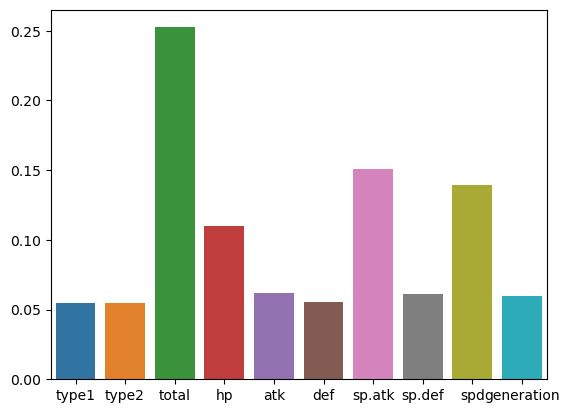

In [70]:
plot = sns.barplot(y=random_forest.feature_importances_, x=features)

After multiple times of running the feature importance plot and inspecting it you can see that the 'total' stat is much more important than the other features. The only features that seem somewhat important are 'spd', 'sp.atk', sometimes the plot shows the 'atk' and 'hp' as somewhat important. This is because  this means I will have to remove multiple columns in the data that I use for my ML models. The ones I will remove are the 'type1', 'type2' and 'generation' columns. This is because they are categorical values and not continuous values. I will keep the other columns because they don't seem important they are still values that would be looked at when picking the Pokémon you want to use.

In [71]:
features = ["total", "hp", "atk", "def", "sp.atk", "sp.def", "spd"]
target = "count"

X = df_gen9[features]
y = df_gen9[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1)

rf = random_forest.fit(X_train, y_train)
score = rf.score(X_test, y_test)
print("R^2:", score)

R^2: -2.4935198911482974


In [72]:
scores = cv_score(rf, X_train, y_train, cv=5)
print("R^2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

R^2: 0.19 (+/- 0.44)


array([-0.00571099,  0.4427678 , -0.13219326,  0.31892683,  0.34105377])

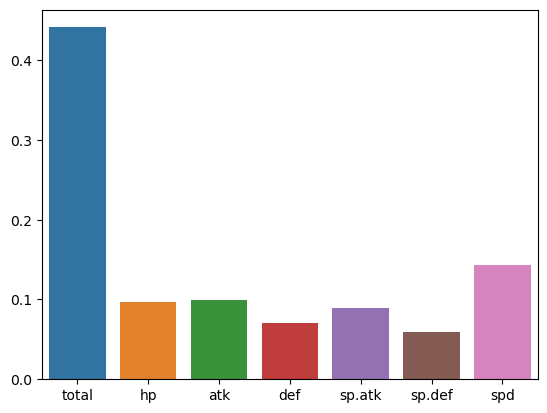

In [73]:
plot = sns.barplot(y=random_forest.feature_importances_, x=features)

After removing the columns I got around the same score as before, this would mean that the columns I removed were not really important.


### Hyperparameter tuning
To further improve the accuracy of my model I want to apply hyperparameter tuning on the random forest regressor to find the most optimal parameters. First I want to take a look at all the parameters that I can use to improve my model.

In [74]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(random_forest.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 15,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


After inspecting the parameters I did some research on the parameters to find out the most important parameters. To do this I first needed to take a look at the [official documentation of the random forest regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor). This was to find out exactly what the parameters do. This gave me a better insight into the model I am currently using. After doing this I wanted to find out which parameters are the most important. I found an [article](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74) that gave me a good insight into the most important parameters. These are the parameters I want to tune the model. To validate the tuning I will also use the 'score' function to get the accuracy of the model.

to find the most optimal parameters I want to try using 2 different methods. The first method is to use the GridSearchCV method. This method will try all the parameters that I give it and will return the best parameters. The second method is to use the RandomizedSearchCV method. this method will try a random selection of the parameters that I give it and will return the best parameters. I will use both methods to see which one gives me the best results.

GridSearchCV is very exhaustive but that is also the downside of it. It will try all the parameters that I give it and will take a lot of time to run. RandomizedSearchCV will try a random selection of the parameters that I give it and will take less time to run. I will use both methods to see which one gives me the best results. To find the optimal max_depth and n_estimators values I will first use the RandomizedSearchCV method to hopefully find a smaller range of parameters to use for the GridSearchCV method.

First we need to select the ranges to test for the randomsearch. I will use the ranges that were used in the article I found earlier. I will also use the same ranges for the GridSearchCV method.

In [75]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 60, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [5, 10, 16, 21, 27, 32, 38, 43, 49, 54, 60, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


The article I read had a nice way to evaluate the output of the parameter tuning. This was done with a self-made method, so I am going to copy and use it

In [76]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy


After selecting the ranges I will now use the RandomizedSearchCV method to find the best parameters. I will use 100 iterations to find the best parameters. This will take a while to run.

In [77]:
import time

start = time.time()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = random_forest, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
pprint(rf_random.fit(X_train, y_train))
end = time.time()
print("time elapsed:" + str(end - start) + " seconds")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(max_depth=15, n_jobs=-1),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 16, 21, 27, 32, 38,
                                                      43, 49, 54, 60, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=2)
time elapsed:64.70328378677368 seconds


In [78]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': True}

{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

After running the RandomizedSearchCV method a couple of times I think I now have enough values to decide on a proper range for the GridSearchCV. The only parameters I think needs further tuning is the n_estimators and the max_depth parameters because these have the most variations in the searches I ran up until now. The values are the same as I used before to see what te the best parameters are.

In [79]:
from sklearn.model_selection import GridSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 6)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 60, num = 11)]
max_depth.append(None)

grid_space = {'n_estimators': n_estimators,
               'max_depth': max_depth}
pprint(grid_space)

{'max_depth': [5, 10, 16, 21, 27, 32, 38, 43, 49, 54, 60, None],
 'n_estimators': [100, 280, 460, 640, 820, 1000]}


In [122]:
start = time.time()
rf_grid = GridSearchCV(estimator = RandomForestRegressor(min_samples_split=2, min_samples_leaf=2, max_features='sqrt',bootstrap=True, n_jobs=-1), param_grid= grid_space, cv = 3, scoring='accuracy', n_jobs = -1)
# Fit the grid search model
pprint(rf_grid.fit(X_train, y_train))
end = time.time()
print("time elapsed:" + str(end - start) + " seconds")

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(max_features='sqrt',
                                             min_samples_leaf=2, n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 16, 21, 27, 32, 38, 43, 49, 54,
                                       60, None],
                         'n_estimators': [100, 280, 460, 640, 820, 1000]},
             scoring='accuracy')
time elapsed:63.69324493408203 seconds


C:\Users\pepij\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]



In [81]:
# grid search results
print('Best grid search hyperparameters are: '+str(rf_grid.best_params_))
print('Best grid search score is: '+str(rf_grid.best_score_))

Best grid search hyperparameters are: {'max_depth': 5, 'n_estimators': 100}
Best grid search score is: nan


Now I want to compare the original model to a model with tuned parameters

In [82]:
scores = cv_score(rf, X_train, y_train, cv=5)
print("R^2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

R^2: 0.15 (+/- 0.47)


array([-0.05435336,  0.42711543, -0.19480512,  0.23848643,  0.34004592])

In [83]:
rf_tuned = RandomForestRegressor(max_depth=5, n_estimators=100  ,min_samples_split=2, min_samples_leaf=2, max_features='sqrt',bootstrap=True, n_jobs=-1)
scores = cv_score(rf_tuned, X_train, y_train, cv=5)
print("R^2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

R^2: 0.27 (+/- 0.18)


array([0.14666073, 0.35462777, 0.2168922 , 0.39031216, 0.23083224])

After looking at the results of both models and running them a couple of times, I found that the average scores of the cross validation are not that much better than they were before, but the average error went down a lot. The scores of the tuned model are rarely negative and if they are the score is much closer to 0 then with the untuned model.

If you apply hyperparameter tuning to your model it is very likely to be an over-fit model, this is of course not ideal. You could even say that if something is not even predictable with a probably over-fit model, it is not predictable at all. So that would further support my null hypothesis.